<a href="https://colab.research.google.com/github/HEMA1188/Istanbul_linearRegression/blob/main/istanbul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("istanbul.csv")
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,1149,365,41,2017-08-04,0.54,2,363,0,NaN
1,27271,Lovely apartment in perfect location,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,389,30,2,2018-05-04,0.02,1,332,0,NaN
2,27831,"Large, clean, spacious apartment",120067,Defne,NaN,Besiktas,41.06590,29.00502,Entire home/apt,846,1,0,NaN,NaN,1,364,0,NaN
3,28277,Duplex Apartment 11 with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Entire home/apt,657,14,1,2021-05-15,0.18,17,328,1,NaN
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09104,29.05580,Entire home/apt,1198,3,0,NaN,NaN,1,88,0,NaN
5,29241,"↪ Istanbul, Your second house",125742,Şevki,NaN,Beyoglu,41.04803,28.95227,Private room,479,3,0,NaN,NaN,1,365,0,NaN
6,30697,nice home in popular area,132137,Nan,NaN,Beyoglu,41.03350,28.97626,Private room,1114,1,1,2010-06-14,0.01,1,365,0,NaN
7,33368,Deluxe double bedroom @ Nisantasi,135136,Ozlem,NaN,Sisli,41.05382,28.99739,Private room,589,2,1,2014-10-21,0.01,2,364,0,NaN
8,34177,PETIT HOUSE,147330,Ercan,NaN,Besiktas,41.06681,29.04035,Entire home/apt,383,10,8,2016-07-14,0.12,2,241,0,NaN
9,34925,A room in galata beyoglu,150435,Esr,NaN,Beyoglu,41.02704,28.97588,Private room,659,1,0,NaN,NaN,1,365,0,NaN


In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random

#Let's make this notebook reproducible
np.random.seed(42)
random.seed(42)

Data Preparation

In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(22539, 18)

In [6]:
df.isnull().sum()

id                                    0
name                                 25
host_id                               0
host_name                             0
neighbourhood_group               22539
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10468
reviews_per_month                 10468
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           22539
dtype: int64

In [7]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,2.253900e+04,2.253900e+04,0.0,22539.000000,22539.000000,22539.000000,22539.000000,22539.000000,12071.000000,22539.000000,22539.000000,22539.000000,0.0
mean,3.748000e+07,1.981070e+08,NaN,41.028327,28.983218,748.420560,6.926350,9.803851,1.141775,6.968144,272.506855,3.227295,NaN
std,1.488431e+07,1.439183e+08,NaN,0.048278,0.133794,2163.496832,35.990197,27.041463,1.497781,12.641702,119.649686,8.101584,NaN
min,2.081500e+04,1.176800e+04,NaN,40.812890,28.003680,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,3.109210e+07,4.468332e+07,NaN,41.004645,28.972720,255.000000,1.000000,0.000000,0.190000,1.000000,179.000000,0.000000,NaN
50%,4.230828e+07,2.116851e+08,NaN,41.031370,28.982570,439.000000,1.000000,1.000000,0.660000,2.000000,348.000000,0.000000,NaN
75%,4.913761e+07,3.310850e+08,NaN,41.048320,29.014200,744.000000,3.000000,6.000000,1.540000,7.000000,364.000000,2.000000,NaN
max,5.305890e+07,4.293917e+08,NaN,41.483730,29.906370,111363.000000,730.000000,622.000000,25.950000,93.000000,365.000000,326.000000,NaN


In [8]:
df.describe(exclude='number')

,name,host_name,neighbourhood,room_type,last_review
count,22514,22539,22539,22539,12071
unique,21510,4434,39,4,1708
top,"Classy, quality furnished residence-7/24 security",Mehmet,Beyoglu,Entire home/apt,2021-10-10
freq,17,337,6145,12727,142


In [9]:
len(df['id'].unique())

22539

In [10]:
len(df['host_id'].unique())

12122

In [11]:
len(df['host_name'].unique())

4434

In [12]:
len(df['name'].unique())

21511

In [13]:
len(df['room_type'].unique())

4

In [14]:
len(df['neighbourhood'].unique())

39

Drop which have no datas and not required

In [15]:

data1=df
data1.drop(['neighbourhood_group', 'id','license','name','host_name'], axis=1, inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22539 entries, 0 to 22538
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         22539 non-null  int64  
 1   neighbourhood                   22539 non-null  object 
 2   latitude                        22539 non-null  float64
 3   longitude                       22539 non-null  float64
 4   room_type                       22539 non-null  object 
 5   price                           22539 non-null  int64  
 6   minimum_nights                  22539 non-null  int64  
 7   number_of_reviews               22539 non-null  int64  
 8   last_review                     12071 non-null  object 
 9   reviews_per_month               12071 non-null  float64
 10  calculated_host_listings_count  22539 non-null  int64  
 11  availability_365                22539 non-null  int64  
 12  number_of_reviews_ltm           

Handling Missing Values

last_review and reviews_per_month nearly 50% data is missing so i filling with Zeros

In [16]:
data1['reviews_per_month'].fillna(0, inplace=True)

# convert the last_review column into a datetime object
data1['last_review'] = pd.to_datetime(data1['last_review'], errors='coerce')  # Convert to datetime
data1['last_review'].fillna(0, inplace=True)

In [18]:
data1.isnull().sum()

host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

EDA Process

In [19]:
data1['room_type'].value_counts()

room_type
Entire home/apt    12727
Private room        8756
Hotel room           605
Shared room          451
Name: count, dtype: int64

In [20]:
data1['neighbourhood'].value_counts()

neighbourhood
Beyoglu          6145
Sisli            3189
Fatih            3164
Kadikoy          2020
Besiktas         1412
Uskudar           637
Esenyurt          600
Kagithane         505
Atasehir          410
Maltepe           334
Sariyer           318
Bagcilar          307
Bakirkoy          266
Bahcelievler      260
Umraniye          256
Adalar            239
Basaksehir        239
Avcilar           215
Pendik            210
Sile              202
Kartal            201
Eyup              196
Kucukcekmece      184
Beykoz            123
Beylikduzu        120
Buyukcekmece      110
Zeytinburnu        97
Arnavutkoy         94
Tuzla              91
Gaziosmanpasa      74
Sancaktepe         59
Gungoren           55
Cekmekoy           50
Silivri            46
Bayrampasa         30
Catalca            26
Sultanbeyli        20
Sultangazi         20
Esenler            15
Name: count, dtype: int64

In [21]:
len(data1['neighbourhood'].unique())

39

<ipython-input-22-0250ce12e5da>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data1['price'], rug=True)


<Axes: xlabel='price', ylabel='Density'>

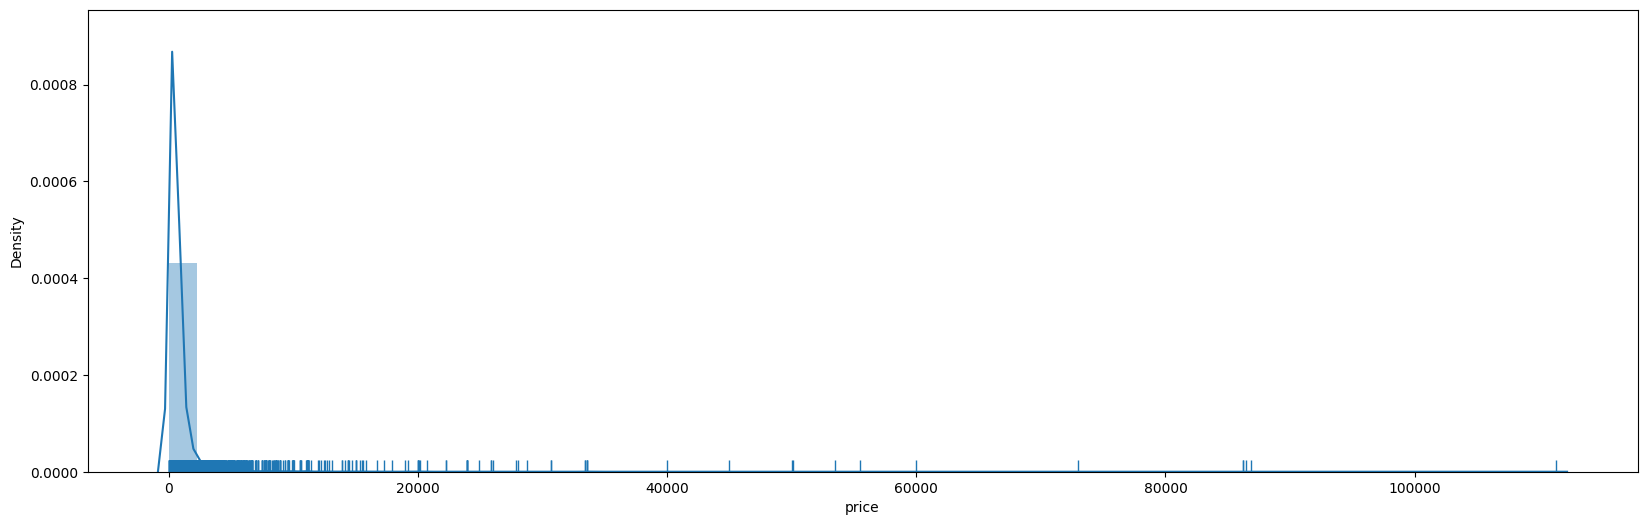

In [22]:
plt.figure(figsize=(20,6))
sb.distplot(data1['price'], rug=True)

<Axes: title={'center': 'price'}, xlabel='room_type'>

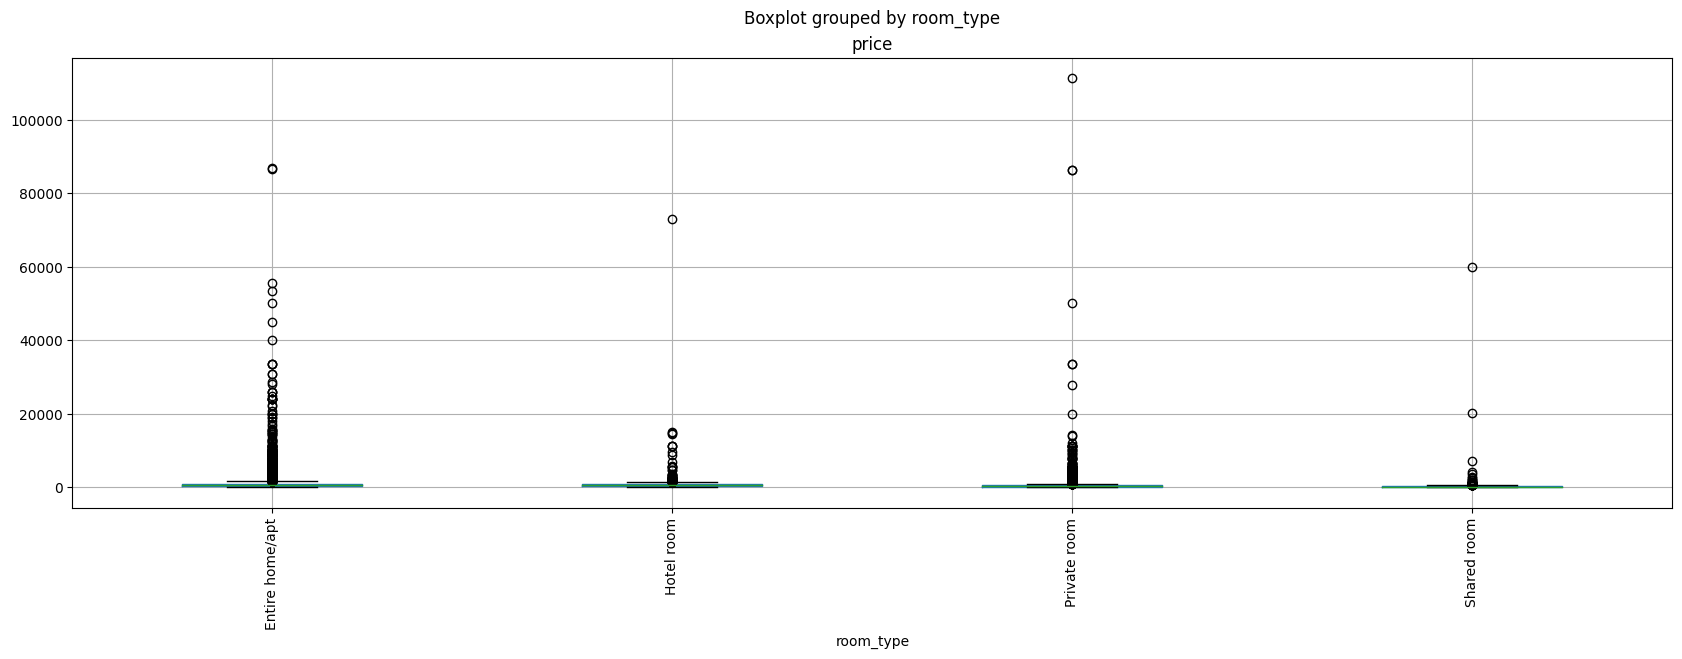

In [23]:
data1.boxplot(column='price', by='room_type', figsize=(20,6), rot=90)

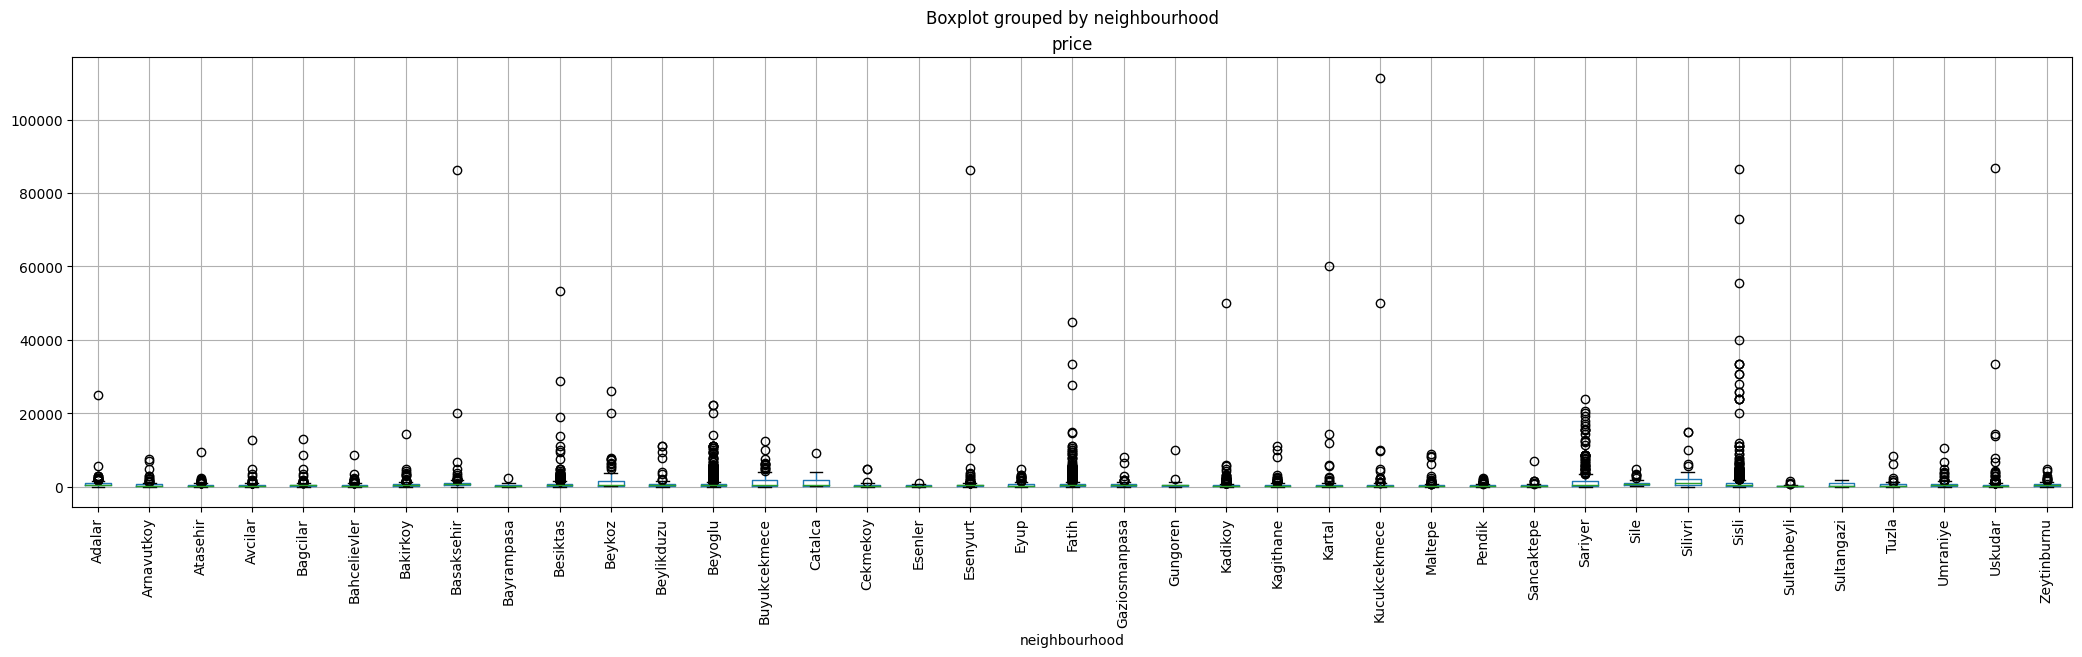

In [25]:
data1.boxplot(column='price', by='neighbourhood', figsize=(25,6), rot=90);

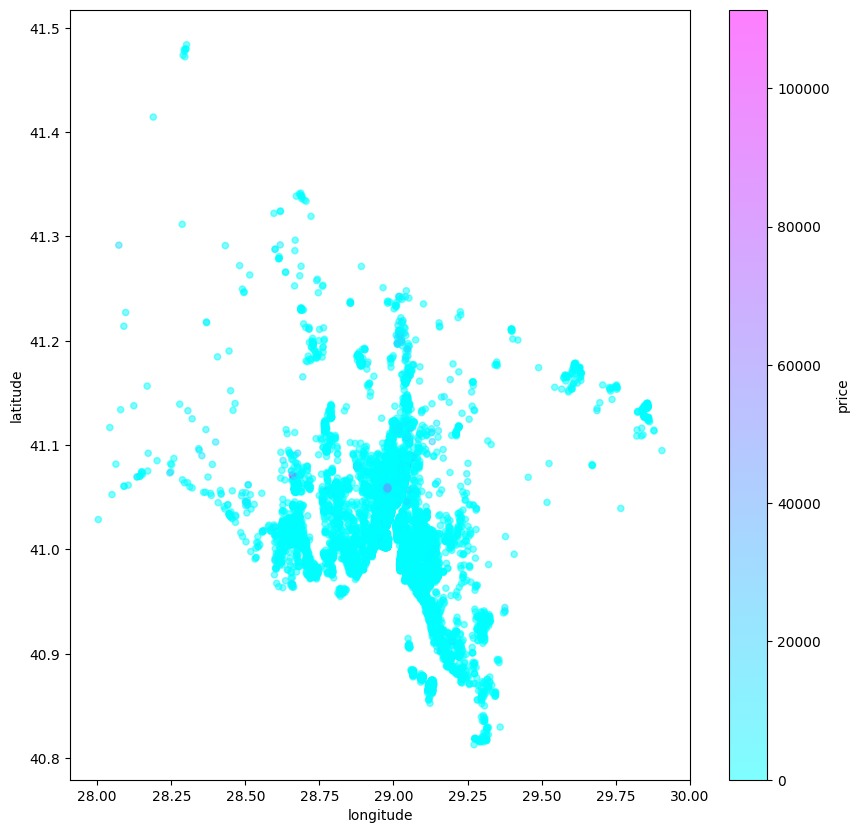

In [26]:
data1.plot.scatter(x='longitude', y='latitude', c='price', figsize=(10,10), cmap='cool', alpha=0.5);

In [28]:
print(data1['price'].max())

111363


In [29]:
print(data1['price'].min())

0


In [30]:
data1.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.253900e+04,22539.000000,22539.000000,22539.000000,22539.000000,22539.000000,22539.000000,22539.000000,22539.000000,22539.000000
mean,1.981070e+08,41.028327,28.983218,748.420560,6.926350,9.803851,0.611489,6.968144,272.506855,3.227295
std,1.439183e+08,0.048278,0.133794,2163.496832,35.990197,27.041463,1.235184,12.641702,119.649686,8.101584
min,1.176800e+04,40.812890,28.003680,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4.468332e+07,41.004645,28.972720,255.000000,1.000000,0.000000,0.000000,1.000000,179.000000,0.000000
50%,2.116851e+08,41.031370,28.982570,439.000000,1.000000,1.000000,0.040000,2.000000,348.000000,0.000000
75%,3.310850e+08,41.048320,29.014200,744.000000,3.000000,6.000000,0.750000,7.000000,364.000000,2.000000
max,4.293917e+08,41.483730,29.906370,111363.000000,730.000000,622.000000,25.950000,93.000000,365.000000,326.000000


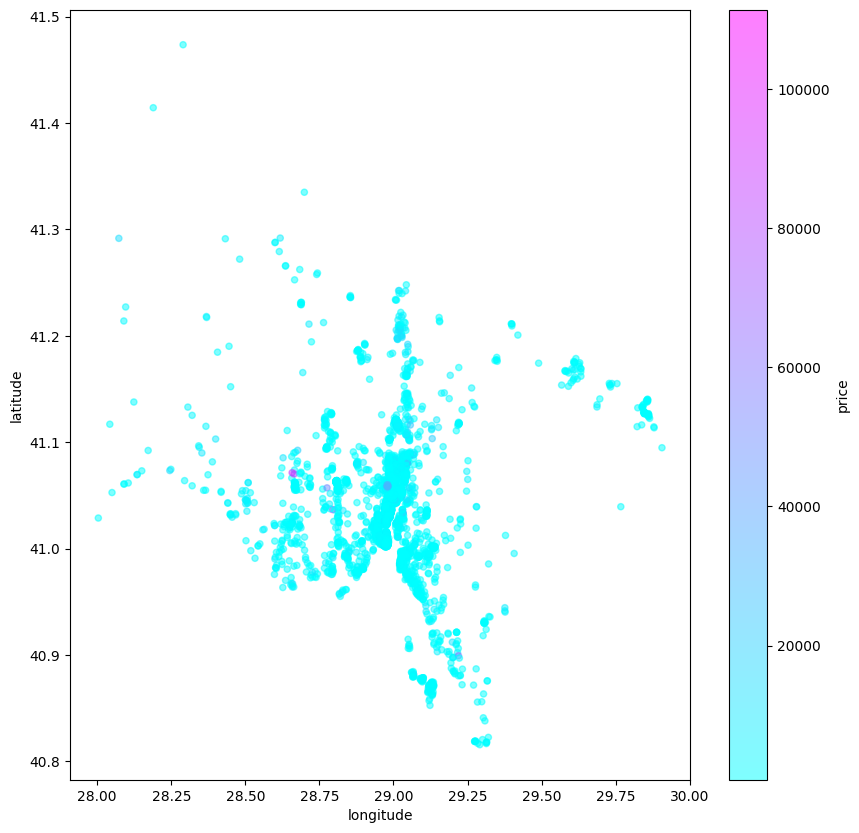

In [33]:
data1[data1['price']>744].plot.scatter(x='longitude', y='latitude', c='price', figsize=(10,10), cmap='cool', alpha=0.5);

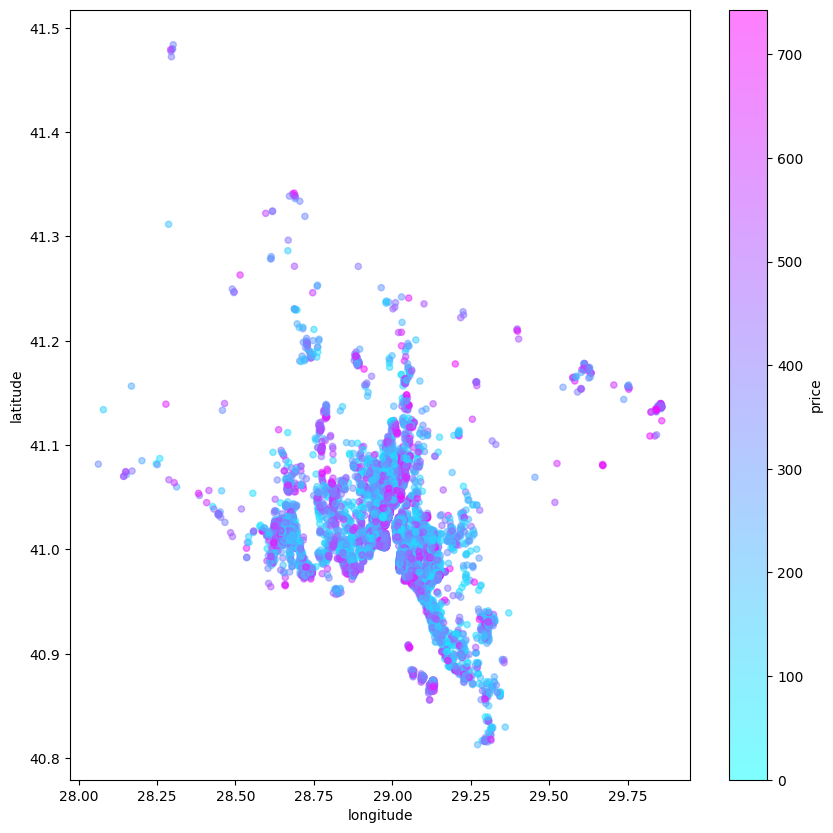

In [34]:
data1[data1['price']<744].plot.scatter(x='longitude', y='latitude', c='price', figsize=(10,10), cmap='cool', alpha=0.5);

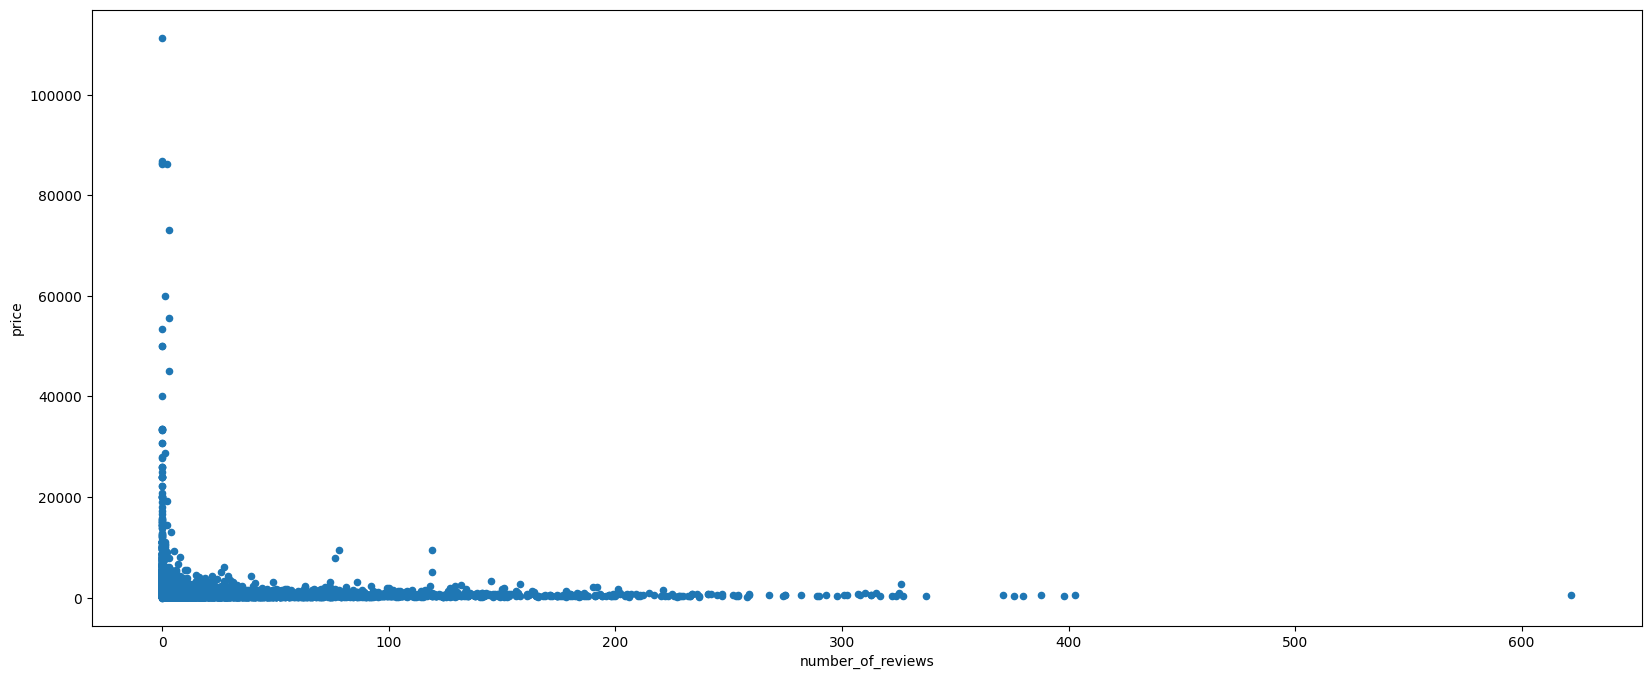

In [36]:
data1.plot.scatter(x='number_of_reviews', y='price', figsize=(20,8));

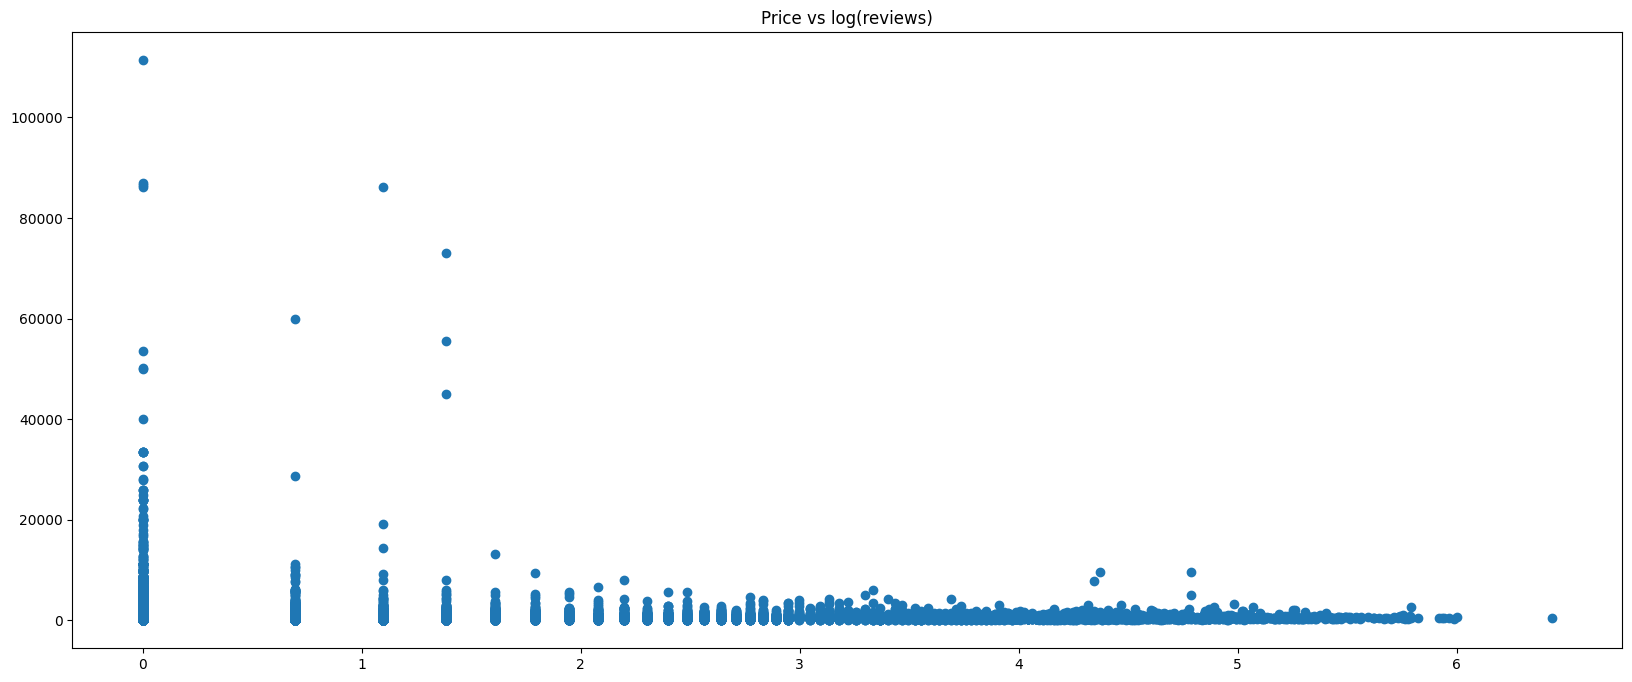

In [37]:
plt.figure(figsize=(20,8))
plt.scatter(np.log(1+data1['number_of_reviews']), data1['price'])
plt.title('Price vs log(reviews)');

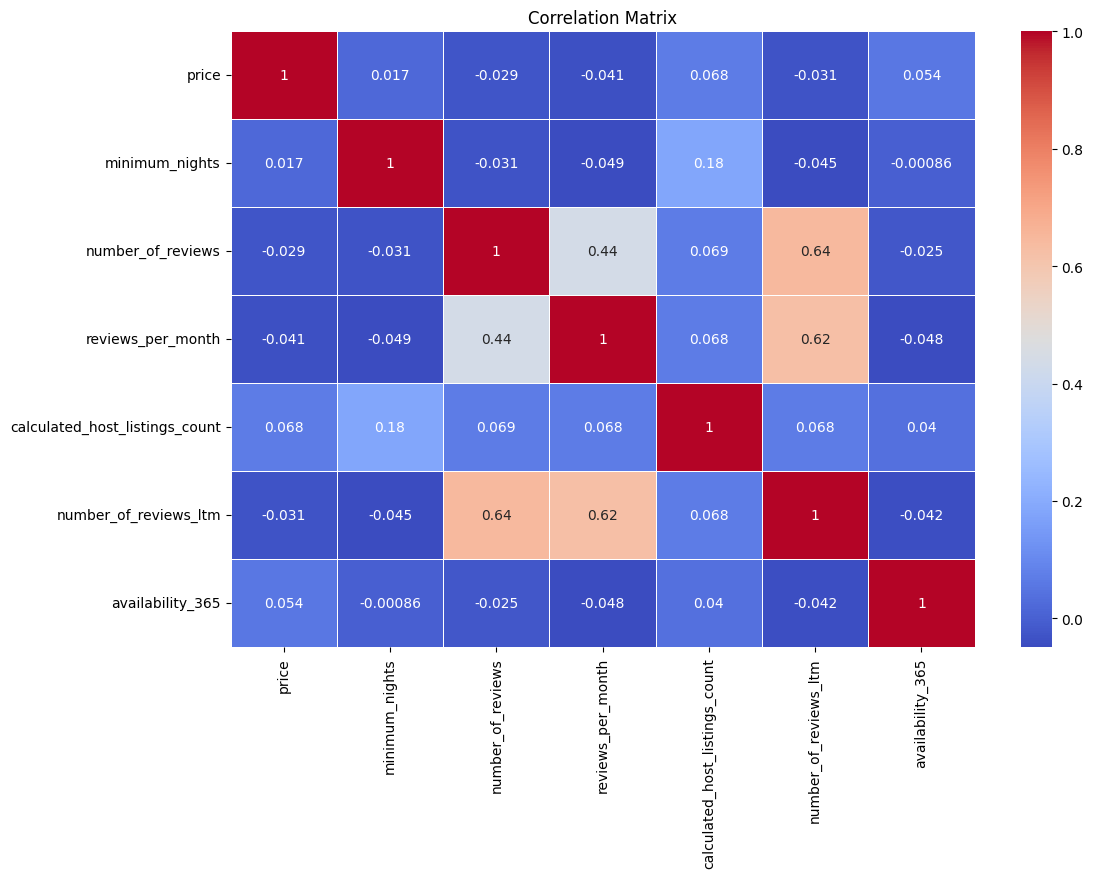

Correlation with Price:
 price                             1.000000
calculated_host_listings_count    0.068134
availability_365                  0.053779
minimum_nights                    0.016508
number_of_reviews                -0.028703
number_of_reviews_ltm            -0.031185
reviews_per_month                -0.040574
Name: price, dtype: float64


In [47]:
import seaborn as sns
# Select numerical columns for correlation analysis
numerical_columns = ['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','number_of_reviews_ltm','availability_365']

# Calculate the correlation matrix
correlation_matrix = data1[numerical_columns].corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Identify features with strong correlation to 'price'
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print("Correlation with Price:\n", price_correlation)

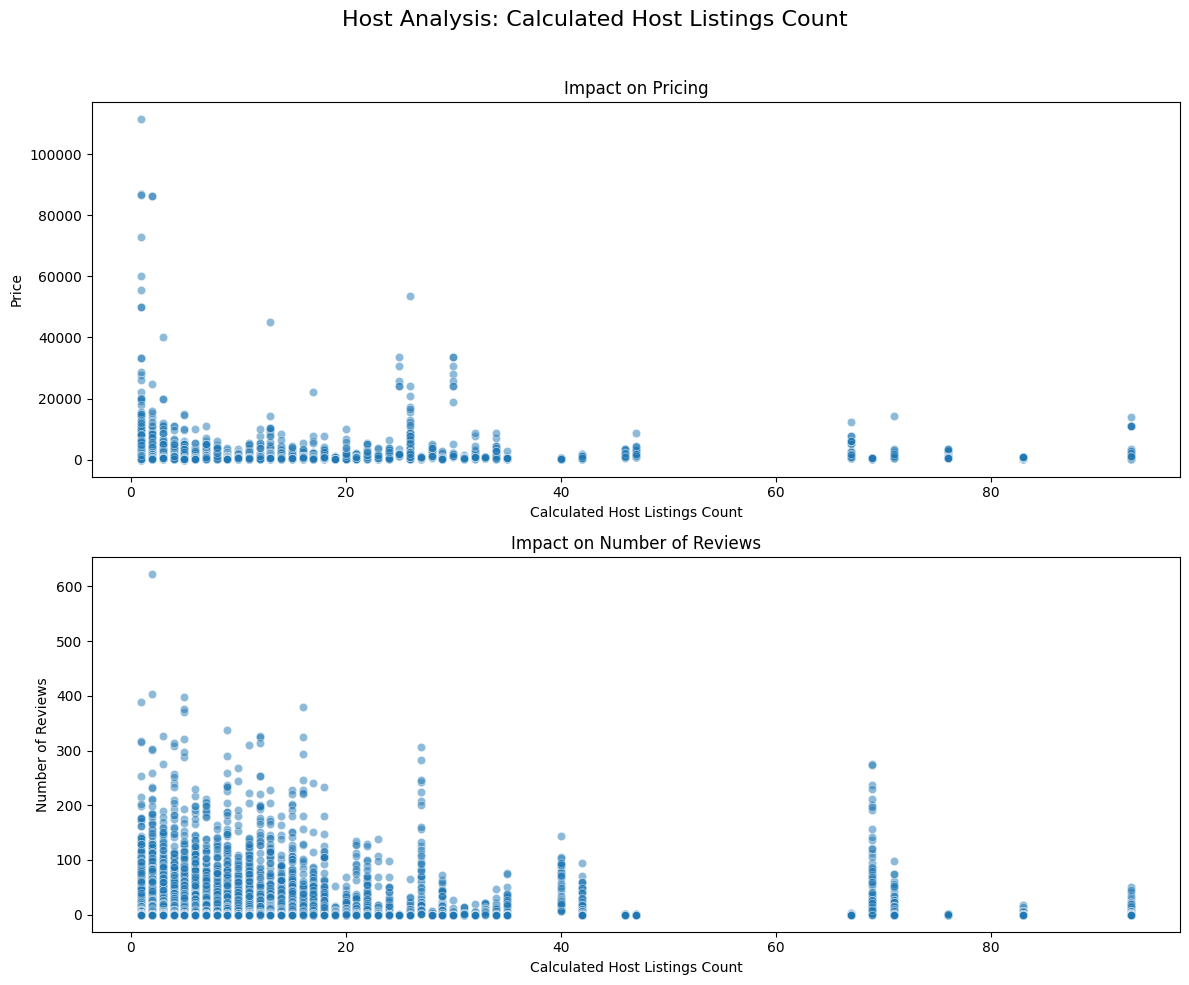

In [50]:
# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
fig.suptitle("Host Analysis: Calculated Host Listings Count", fontsize=16)

# Analyze the impact on pricing
sns.scatterplot(x='calculated_host_listings_count', y='price', data=data1, alpha=0.5, ax=axes[0])
axes[0].set_title("Impact on Pricing")
axes[0].set_xlabel("Calculated Host Listings Count")
axes[0].set_ylabel("Price")

# Analyze the impact on reviews
sns.scatterplot(x='calculated_host_listings_count', y='number_of_reviews', data=data1, alpha=0.5, ax=axes[1])
axes[1].set_title("Impact on Number of Reviews")
axes[1].set_xlabel("Calculated Host Listings Count")
axes[1].set_ylabel("Number of Reviews")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

IndexError: index 3 is out of bounds for axis 0 with size 3

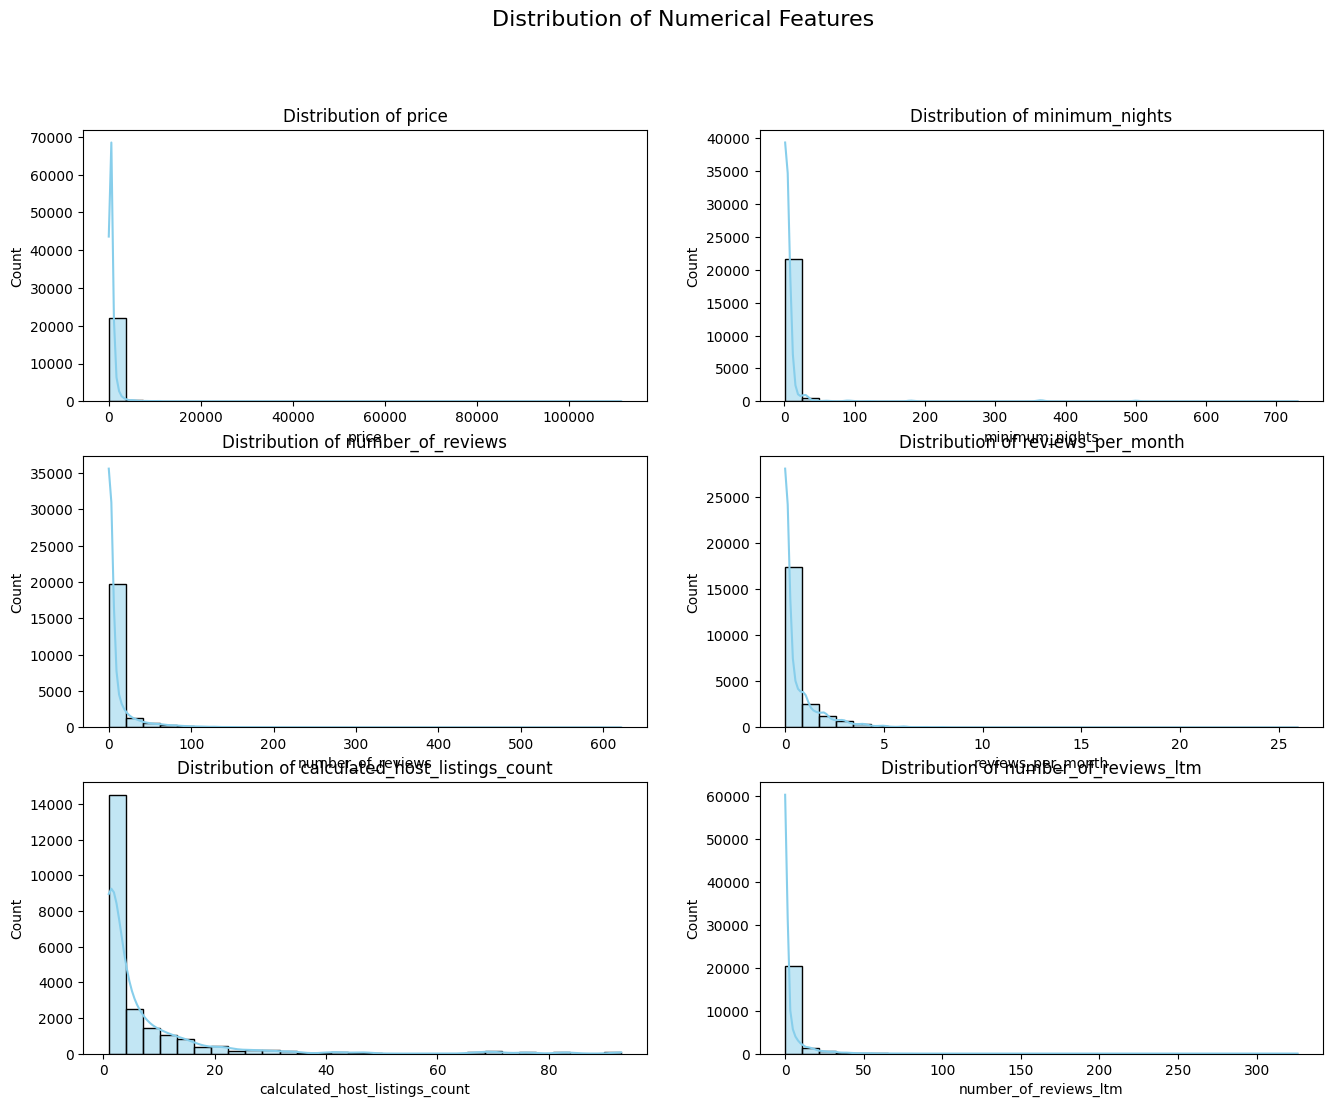

In [52]:
numerical_columns = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','number_of_reviews_ltm','availability_365']
# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

# Plot histograms and kernel density plots
for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 2)
    sns.histplot(data1[column], kde=True, bins=30, color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)

# Adjust layout
plt.tight_layout(react=[0, 0, 1, 0.96])
plt.show()

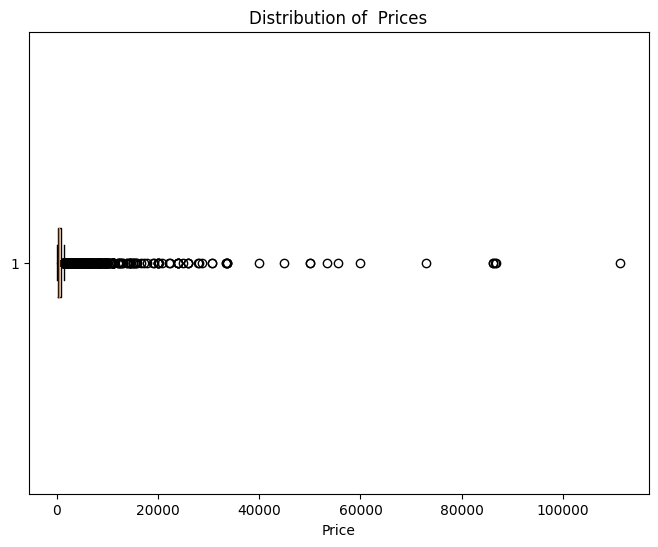

In [55]:

prices = data1['price']

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(prices, vert=False)  # vert=False for horizontal boxplot
plt.title('Distribution of  Prices')
plt.xlabel('Price')
plt.show()

<ipython-input-57-3e85ba82b66c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='neighbourhood', data=data1, palette='viridis')


AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

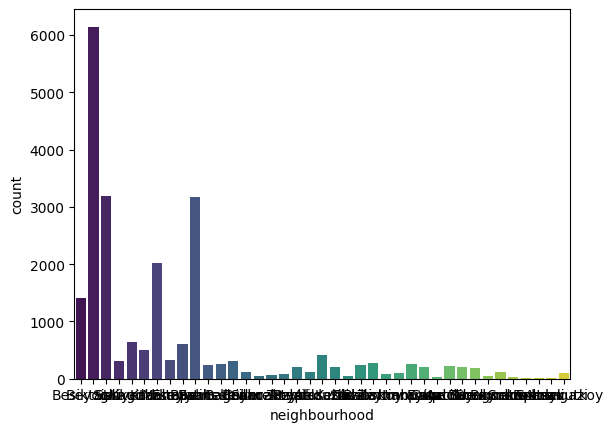

In [57]:
# Plot the distribution of 'neighbourhood'
sns.countplot(x='neighbourhood', data=data1, palette='viridis')
axes[0].set_title('Distribution of Neighbourhood')
axes[0].set_xlabel('Neighbourhood')
axes[0].set_ylabel('Count')

<ipython-input-59-2c634eca22cf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=data1, palette='viridis')


Text(0, 0.5, 'Count')

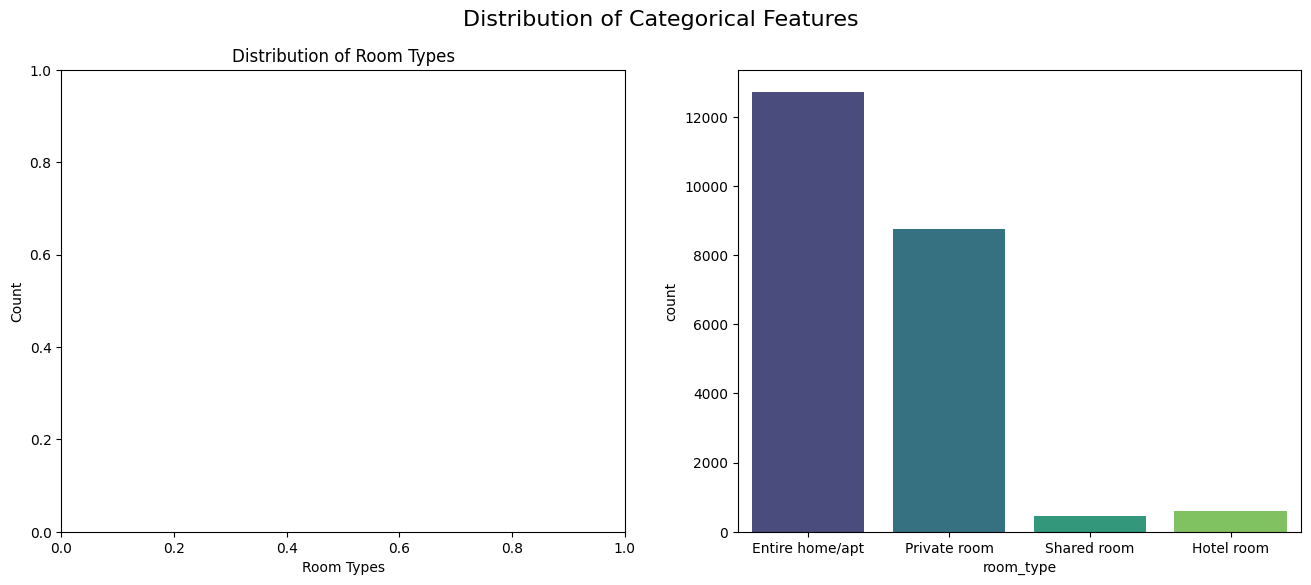

In [59]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle('Distribution of Categorical Features', fontsize=16)

# Plot the distribution of 'room_type'
sns.countplot(x='room_type', data=data1, palette='viridis')
axes[0].set_title('Distribution of Room Types')
axes[0].set_xlabel('Room Types')
axes[0].set_ylabel('Count')

In [64]:
# convert the last_review column into a datetime object
data1['last_review'] = pd.to_datetime(data1['last_review'], errors='coerce')

<ipython-input-65-03223a4f62fe>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='price', data=data1, ci=None, ax=axes[0], sort=False)
<ipython-input-65-03223a4f62fe>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='number_of_reviews', data=data1, ci=None, ax=axes[1], sort=False)


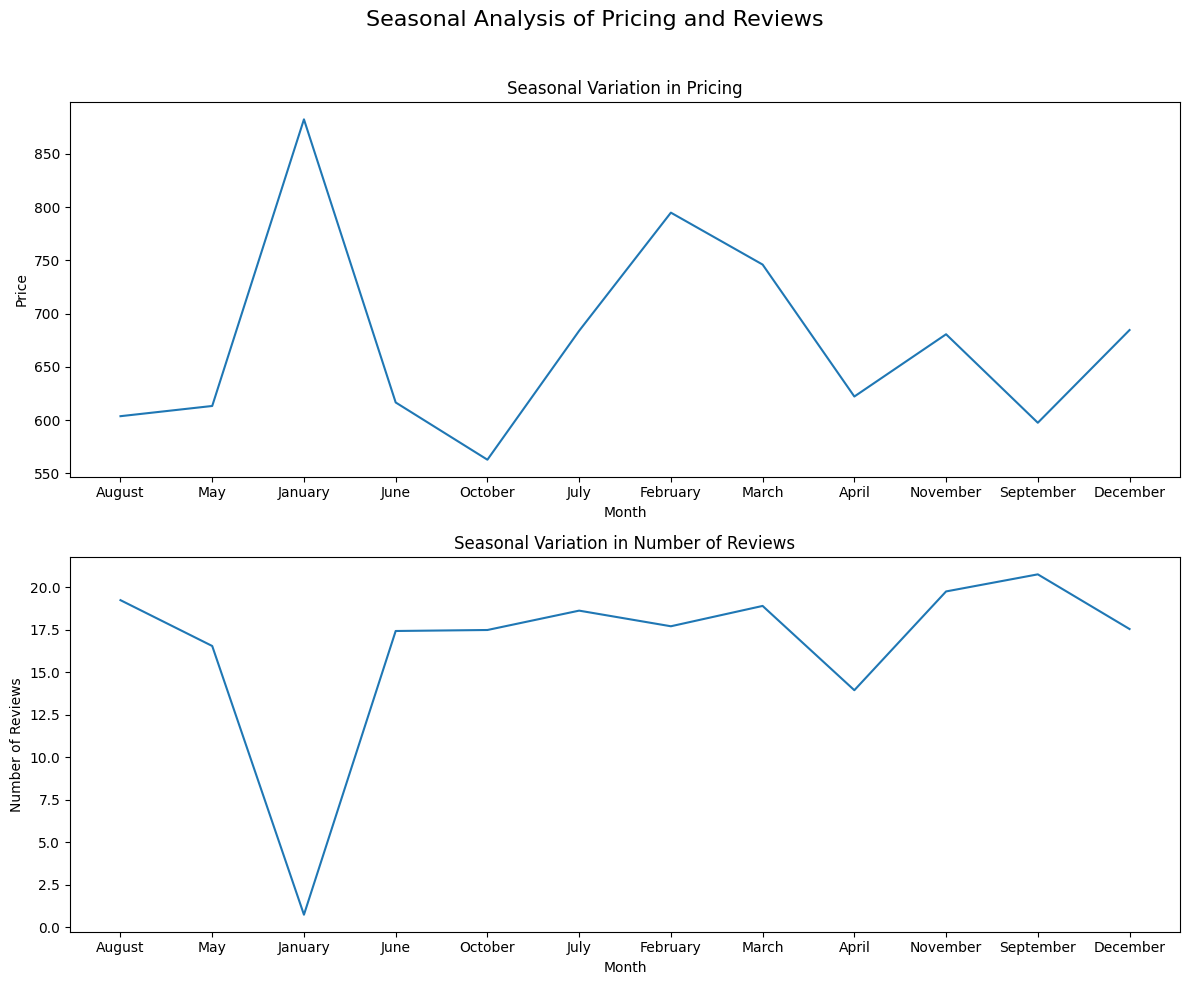

In [65]:
# Extract month and year from 'last_review'
data1['month'] = data1['last_review'].dt.month_name()


# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
fig.suptitle("Seasonal Analysis of Pricing and Reviews", fontsize=16)

# Seasonal analysis of pricing
sns.lineplot(x='month', y='price', data=data1, ci=None, ax=axes[0], sort=False)
axes[0].set_title("Seasonal Variation in Pricing")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Price")

# Seasonal analysis of reviews
sns.lineplot(x='month', y='number_of_reviews', data=data1, ci=None, ax=axes[1], sort=False)
axes[1].set_title("Seasonal Variation in Number of Reviews")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Reviews")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<ipython-input-67-9efe4d9fbac2>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='last_review', y='price', data=data1, ci=None, ax=axes[0])
<ipython-input-67-9efe4d9fbac2>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='last_review', y='minimum_nights', data=data1, ci=None, ax=axes[1])
<ipython-input-67-9efe4d9fbac2>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='last_review', y='number_of_reviews', data=data1, ci=None, ax=axes[2])


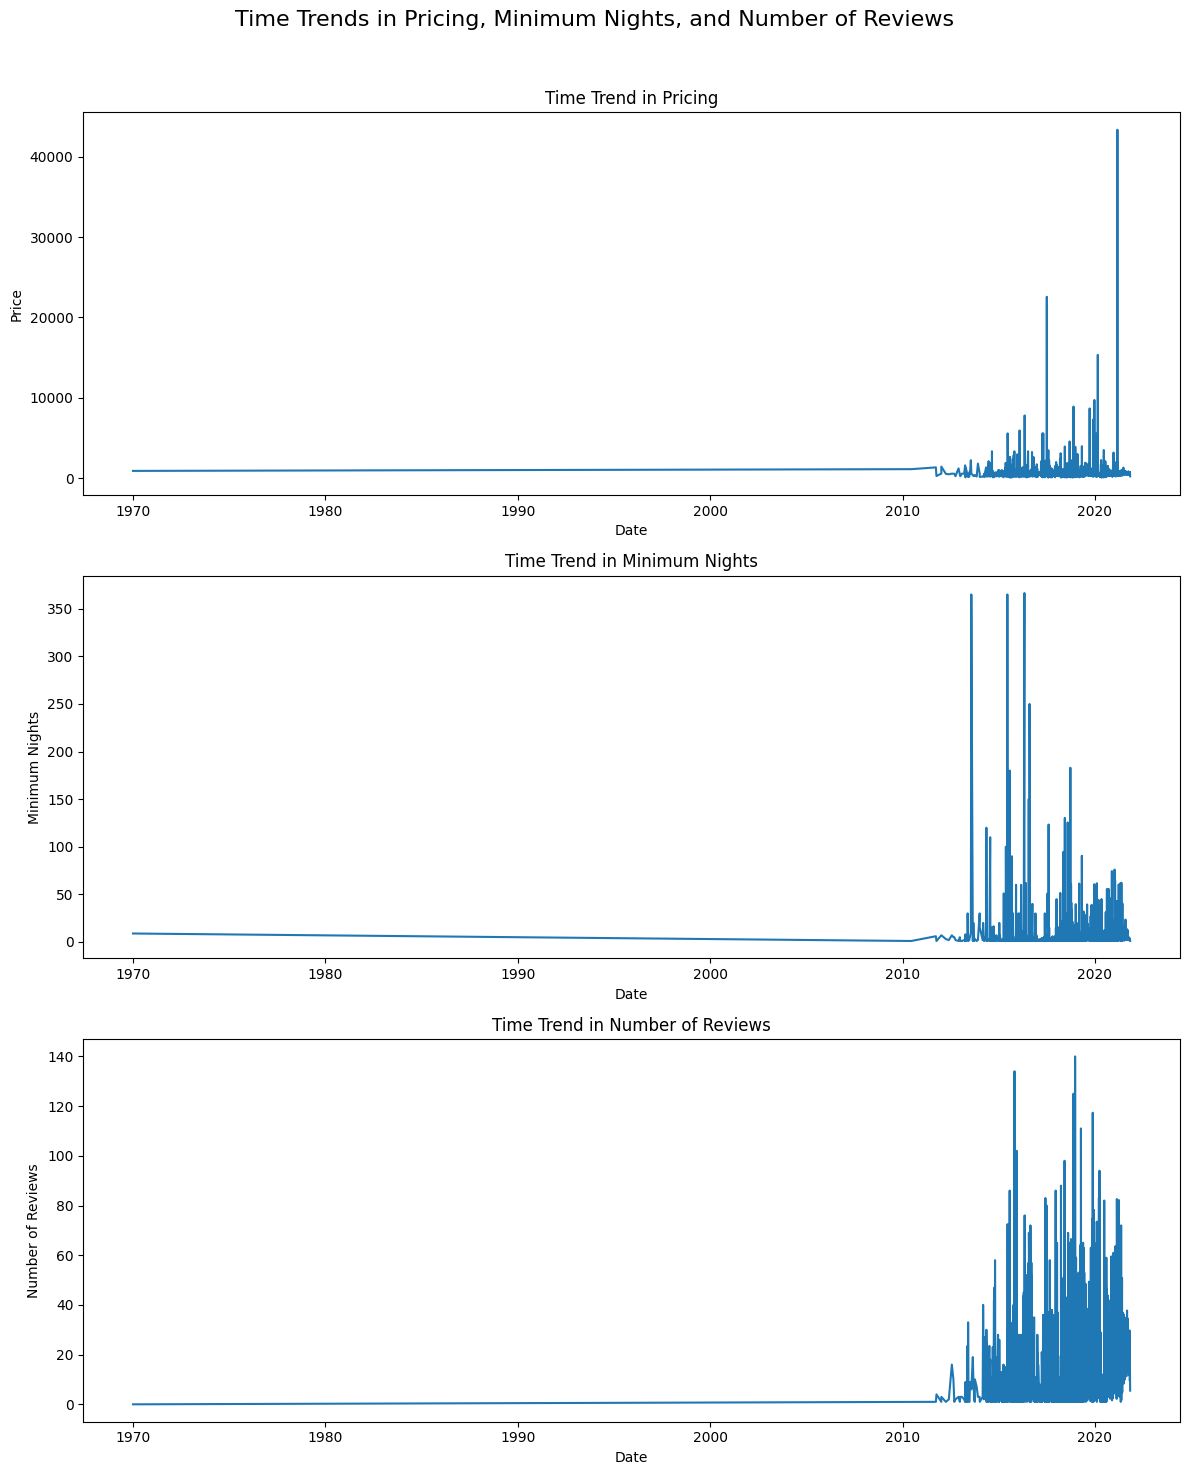

In [67]:
# Extract year and month from 'last_review'
data1['year'] = data1['last_review'].dt.year
data1['month'] = data1['last_review'].dt.month_name()

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
fig.suptitle("Time Trends in Pricing, Minimum Nights, and Number of Reviews", fontsize=16)

# Time trend in pricing
sns.lineplot(x='last_review', y='price', data=data1, ci=None, ax=axes[0])
axes[0].set_title("Time Trend in Pricing")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Price")

# Time trend in minimum nights
sns.lineplot(x='last_review', y='minimum_nights', data=data1, ci=None, ax=axes[1])
axes[1].set_title("Time Trend in Minimum Nights")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Minimum Nights")

# Time trend in number of reviews
sns.lineplot(x='last_review', y='number_of_reviews', data=data1, ci=None, ax=axes[2])
axes[2].set_title("Time Trend in Number of Reviews")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Number of Reviews")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Label encoding

In [68]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data1['neighbourhood']=le.fit_transform(data1['neighbourhood'])
data1['room_type']=le.fit_transform(data1['room_type'])

In [69]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22539 entries, 0 to 22538
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_id                         22539 non-null  int64         
 1   neighbourhood                   22539 non-null  int64         
 2   latitude                        22539 non-null  float64       
 3   longitude                       22539 non-null  float64       
 4   room_type                       22539 non-null  int64         
 5   price                           22539 non-null  int64         
 6   minimum_nights                  22539 non-null  int64         
 7   number_of_reviews               22539 non-null  int64         
 8   last_review                     22539 non-null  datetime64[ns]
 9   reviews_per_month               22539 non-null  float64       
 10  calculated_host_listings_count  22539 non-null  int64         
 11  av

In [70]:
data1['month'] = data1['last_review'].dt.month

Training and testing

In [74]:
X = data1.drop(['price','last_review'], axis = 1)
y = data1['price']

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [76]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [78]:
y_pred = reg.predict(X_test)
rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
print('Training Score: ', reg.score(X_train, y_train))
print('Testing Score: ', reg.score(X_test, y_test))
print('RMSE: ',rmse)

Training Score:  0.027802114468809647
Testing Score:  0.018642042520141677
RMSE:  2371.2476030622392


Remove outliers

In [39]:
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                     'calculated_host_listings_count', 'number_of_reviews_ltm']

# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to remove outliers for each numerical column
for column in numerical_columns:
    df = remove_outliers(df, column)

# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

In [42]:
clean_data=pd.read_csv("cleaned_dataset.csv")
clean_data.head()

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,120067,Besiktas,41.06590,29.00502,Entire home/apt,846,1,0,0,0.00,1,364,0
1,121721,Sariyer,41.09104,29.05580,Entire home/apt,1198,3,0,0,0.00,1,88,0
2,125742,Beyoglu,41.04803,28.95227,Private room,479,3,0,0,0.00,1,365,0
3,132137,Beyoglu,41.03350,28.97626,Private room,1114,1,1,2010-06-14 00:00:00,0.01,1,365,0
4,135136,Sisli,41.05382,28.99739,Private room,589,2,1,2014-10-21 00:00:00,0.01,2,364,0


In [43]:
clean_data.shape

(9408, 13)

<Axes: title={'center': 'price'}, xlabel='room_type'>

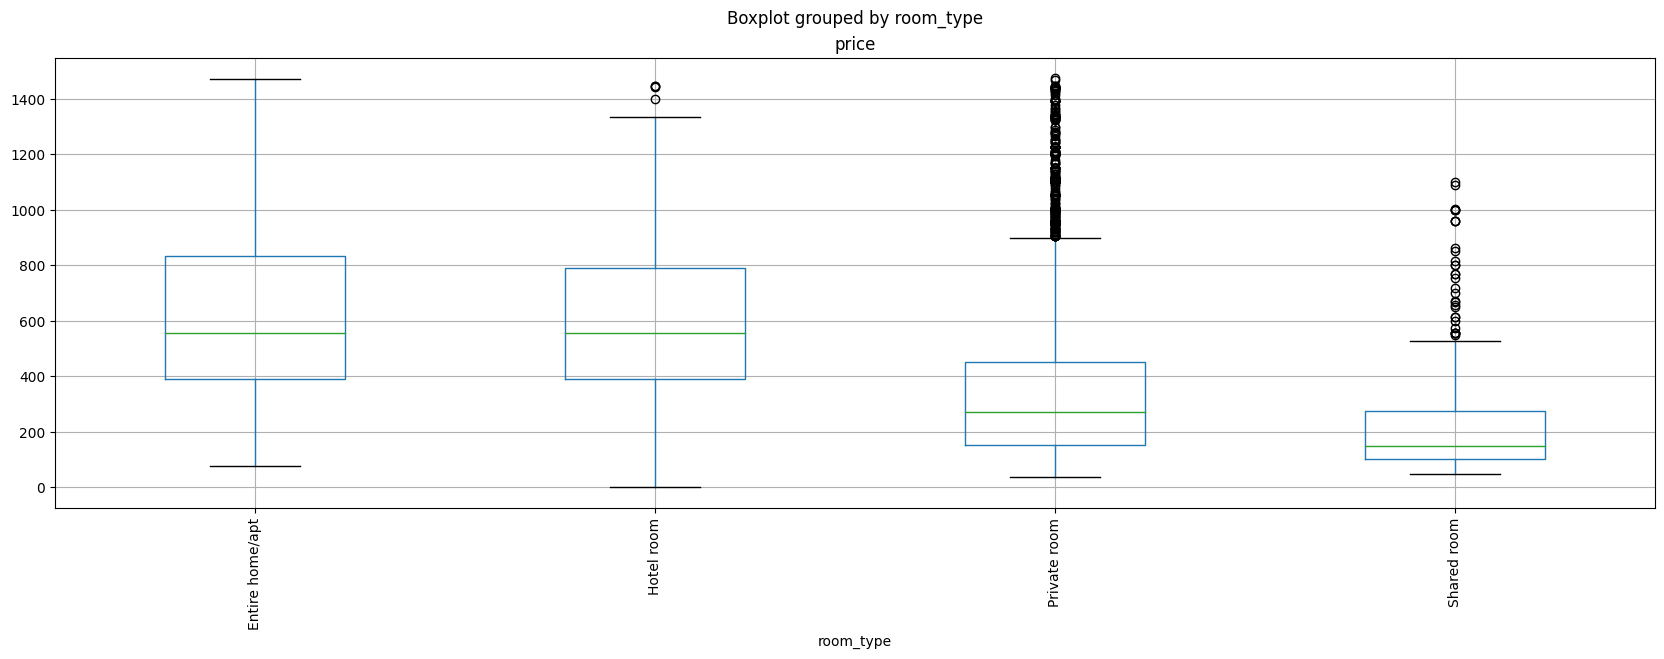

In [44]:
clean_data.boxplot(column='price', by='room_type', figsize=(20,6), rot=90)

<Axes: title={'center': 'price'}, xlabel='neighbourhood'>

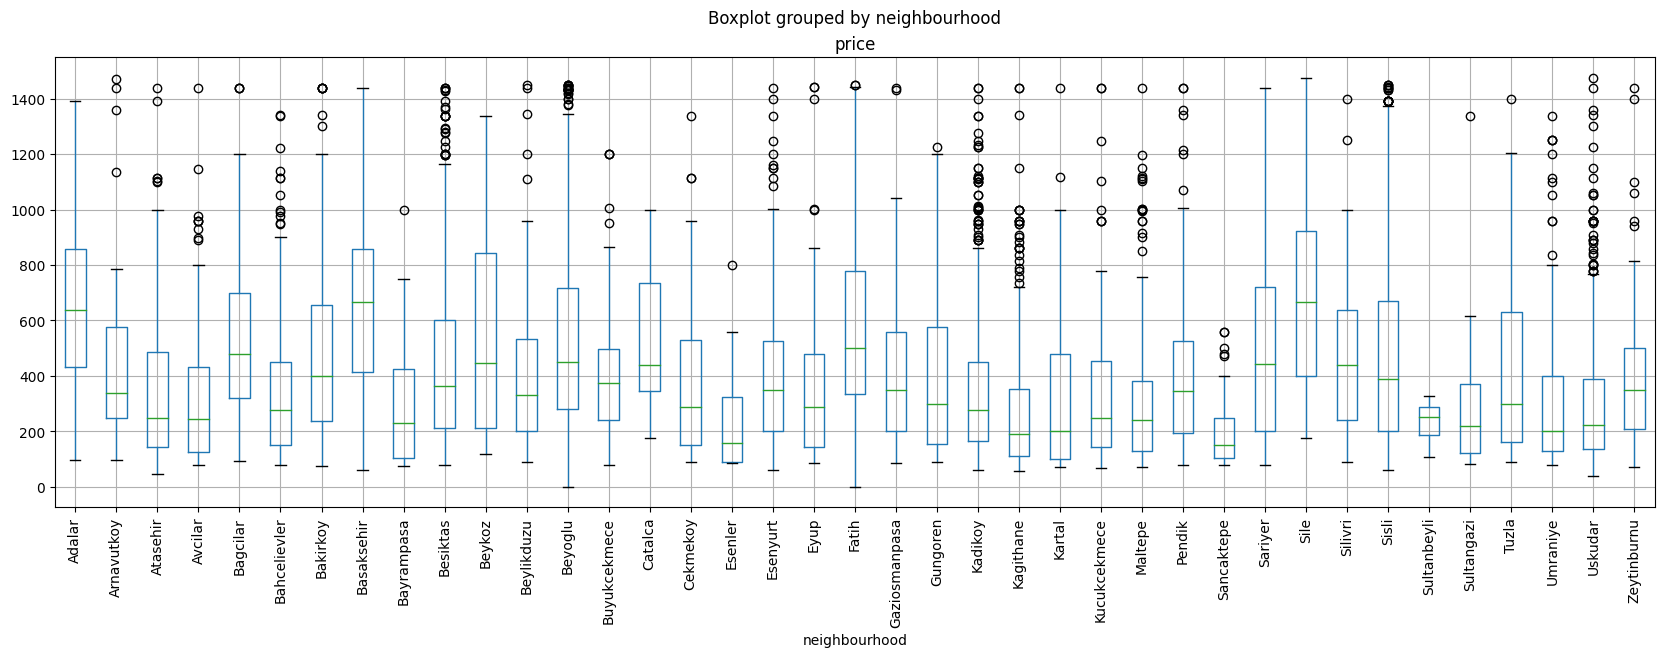

In [45]:
clean_data.boxplot(column='price', by='neighbourhood', figsize=(20,6), rot=90)

array([[<Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>],
       [<Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >,
        <Axes: >]], dtype=object)

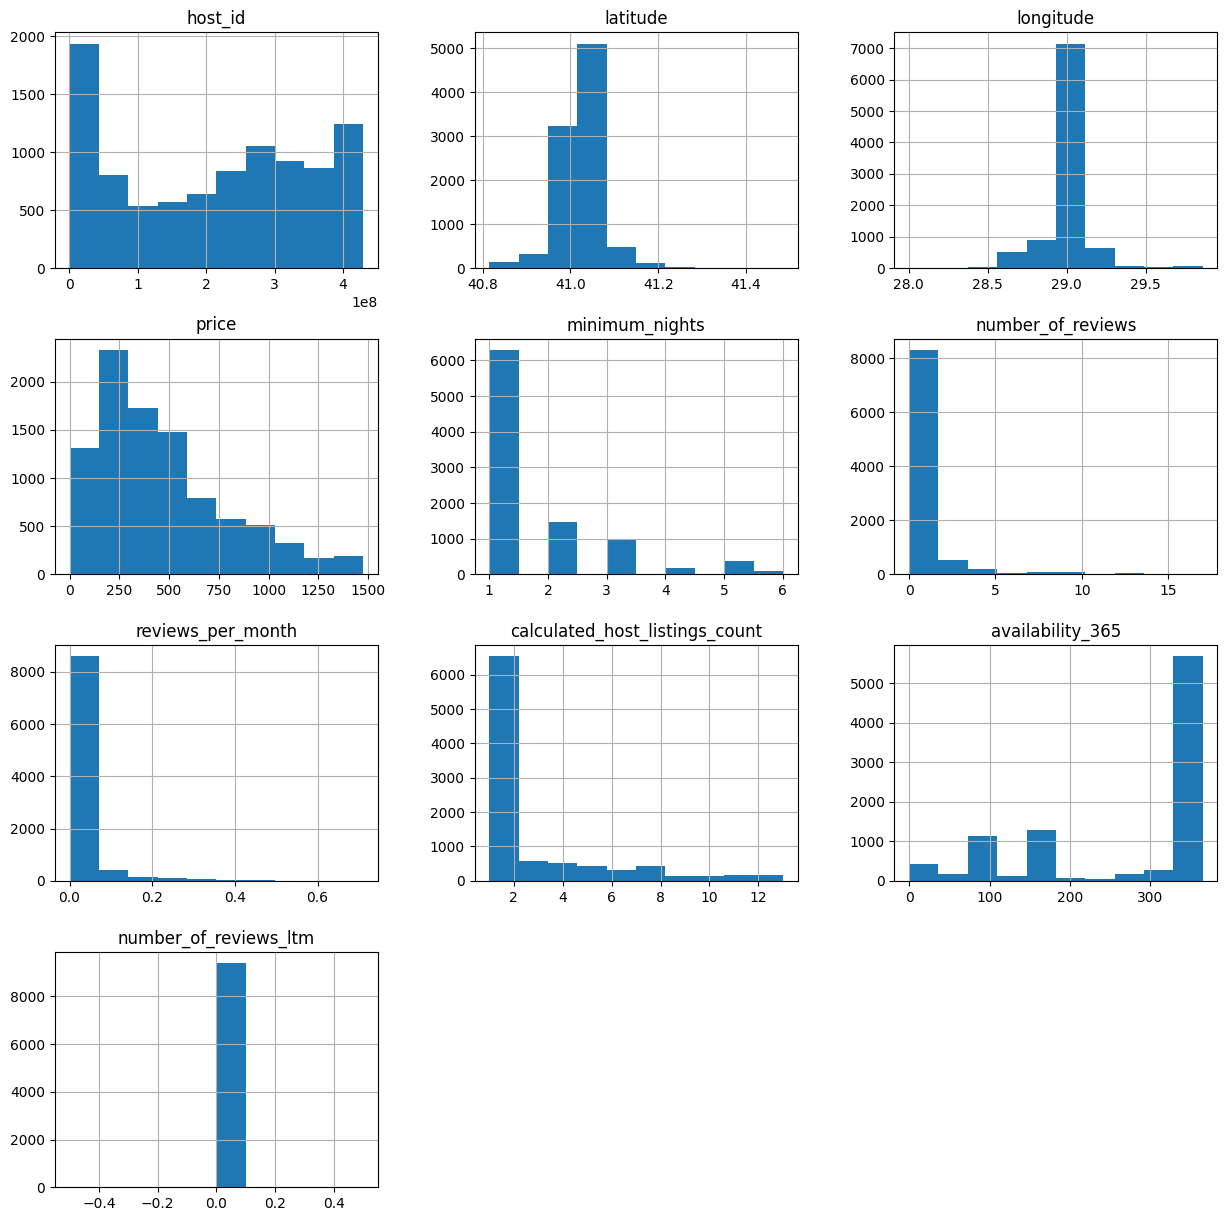

In [46]:
clean_data.hist(figsize=(15, 15))

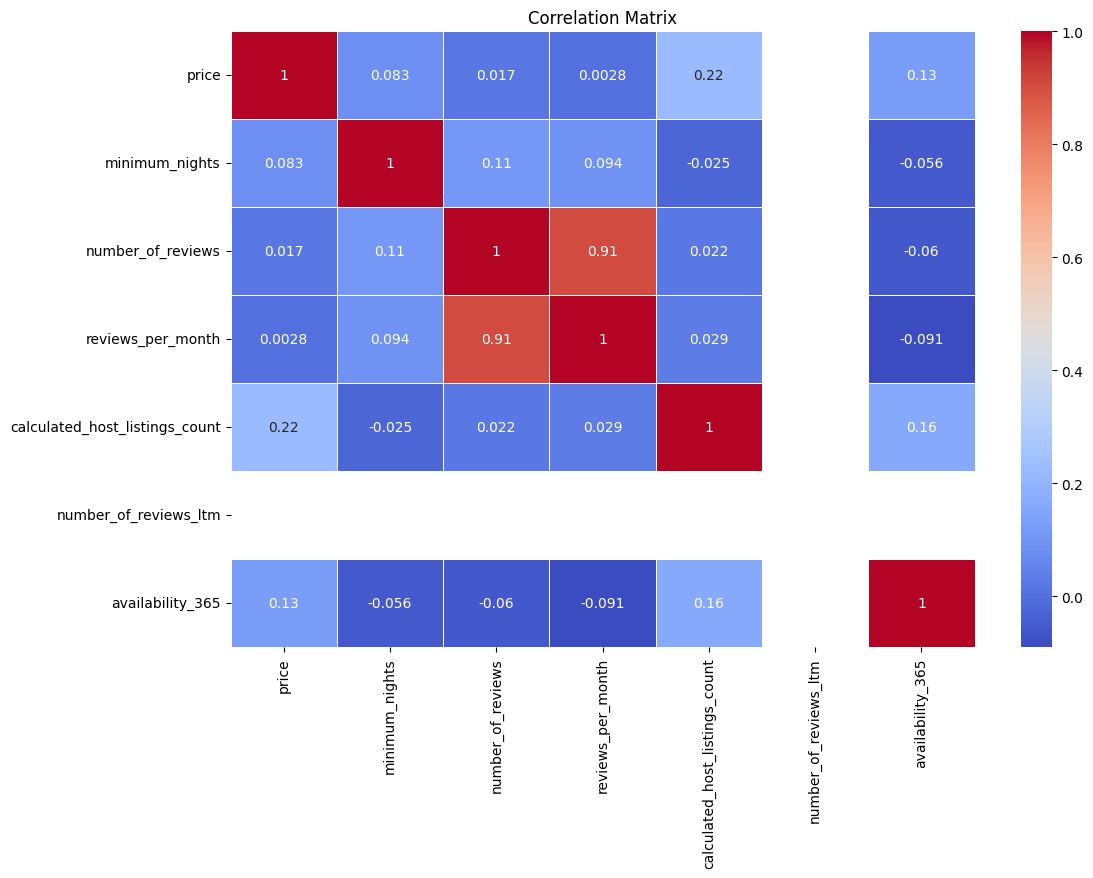

Correlation with Price:
 price                             1.000000
calculated_host_listings_count    0.222724
availability_365                  0.126385
minimum_nights                    0.083296
number_of_reviews                 0.016556
reviews_per_month                 0.002821
number_of_reviews_ltm                  NaN
Name: price, dtype: float64


In [48]:
# Select numerical columns for correlation analysis
numerical_columns = ['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','number_of_reviews_ltm','availability_365']

# Calculate the correlation matrix
correlation_matrix = clean_data[numerical_columns].corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Identify features with strong correlation to 'price'
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print("Correlation with Price:\n", price_correlation)

In [49]:
clean_data.isnull().sum()

host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

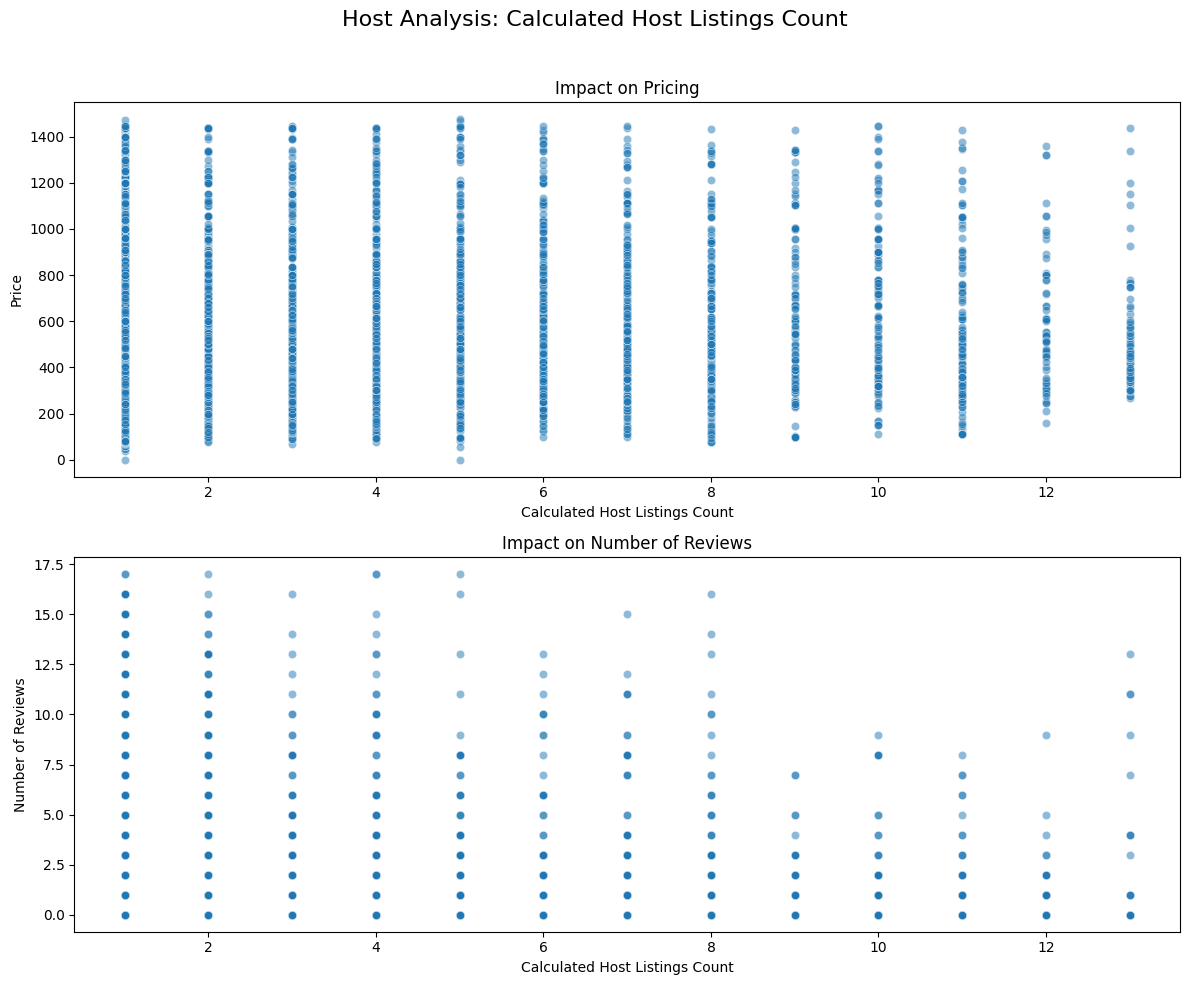

In [51]:
# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
fig.suptitle("Host Analysis: Calculated Host Listings Count", fontsize=16)

# Analyze the impact on pricing
sns.scatterplot(x='calculated_host_listings_count', y='price', data=clean_data, alpha=0.5, ax=axes[0])
axes[0].set_title("Impact on Pricing")
axes[0].set_xlabel("Calculated Host Listings Count")
axes[0].set_ylabel("Price")

# Analyze the impact on reviews
sns.scatterplot(x='calculated_host_listings_count', y='number_of_reviews', data=clean_data, alpha=0.5, ax=axes[1])
axes[1].set_title("Impact on Number of Reviews")
axes[1].set_xlabel("Calculated Host Listings Count")
axes[1].set_ylabel("Number of Reviews")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

IndexError: index 3 is out of bounds for axis 0 with size 3

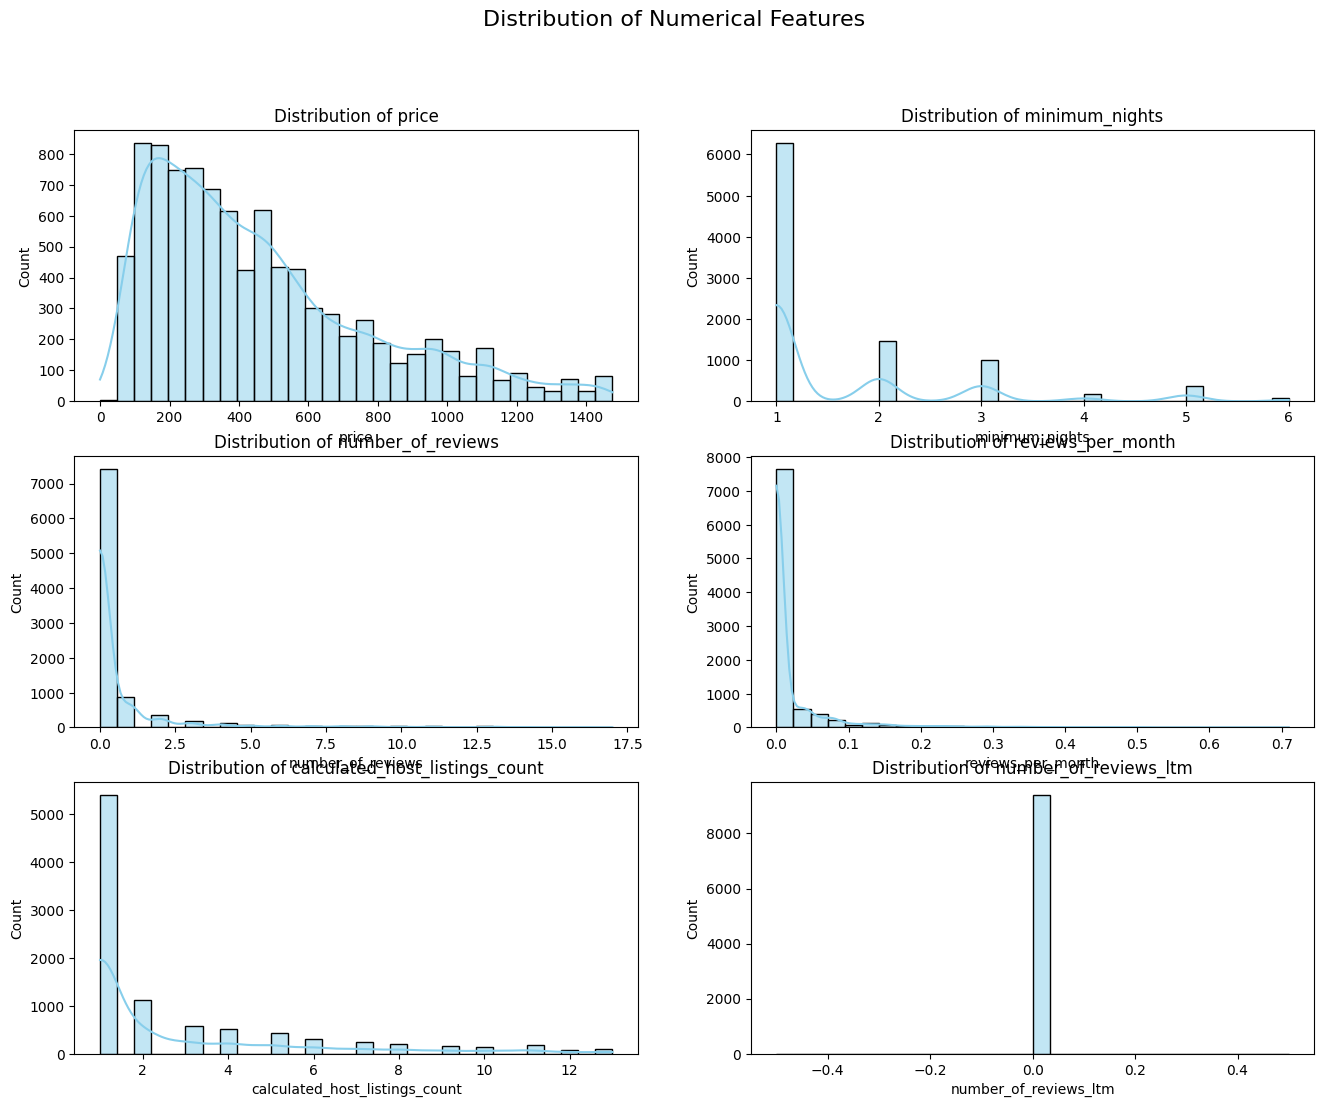

In [53]:
numerical_columns = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','number_of_reviews_ltm','availability_365']
# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

# Plot histograms and kernel density plots
for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 2)
    sns.histplot(clean_data[column], kde=True, bins=30, color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

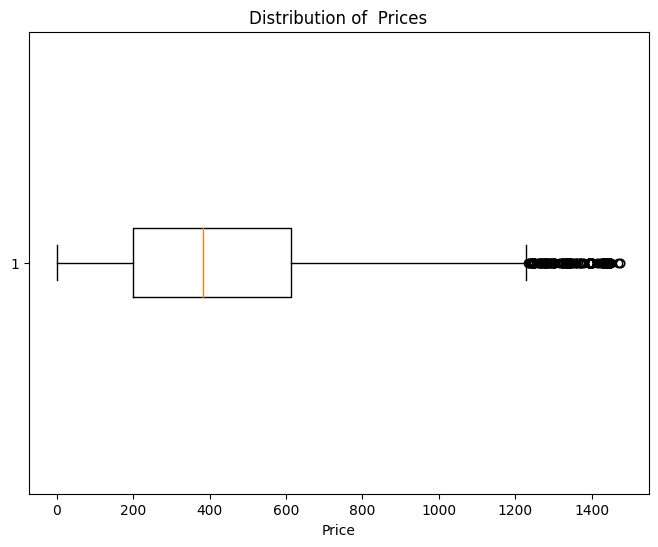

In [56]:

prices = clean_data['price']

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(prices, vert=False)  # vert=False for horizontal boxplot
plt.title('Distribution of  Prices')
plt.xlabel('Price')
plt.show()

<ipython-input-58-aa8b64c6725e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='neighbourhood', data=clean_data, palette='viridis')


AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

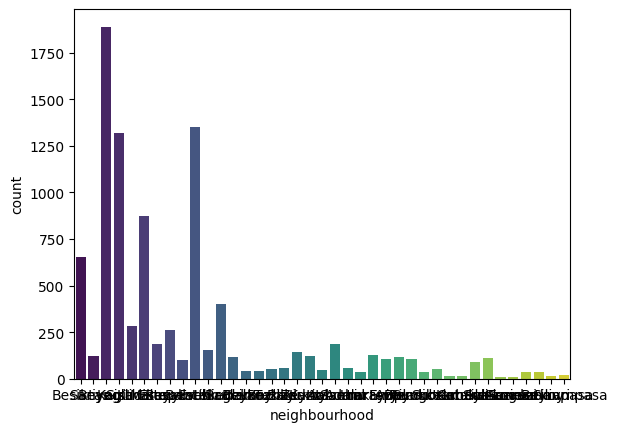

In [58]:
# Plot the distribution of 'neighbourhood'
sns.countplot(x='neighbourhood', data=clean_data, palette='viridis')
axes[0].set_title('Distribution of Neighbourhood')
axes[0].set_xlabel('Neighbourhood')
axes[0].set_ylabel('Count')

<ipython-input-60-6d1fcf8e5e82>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=clean_data, palette='viridis')


Text(0, 0.5, 'Count')

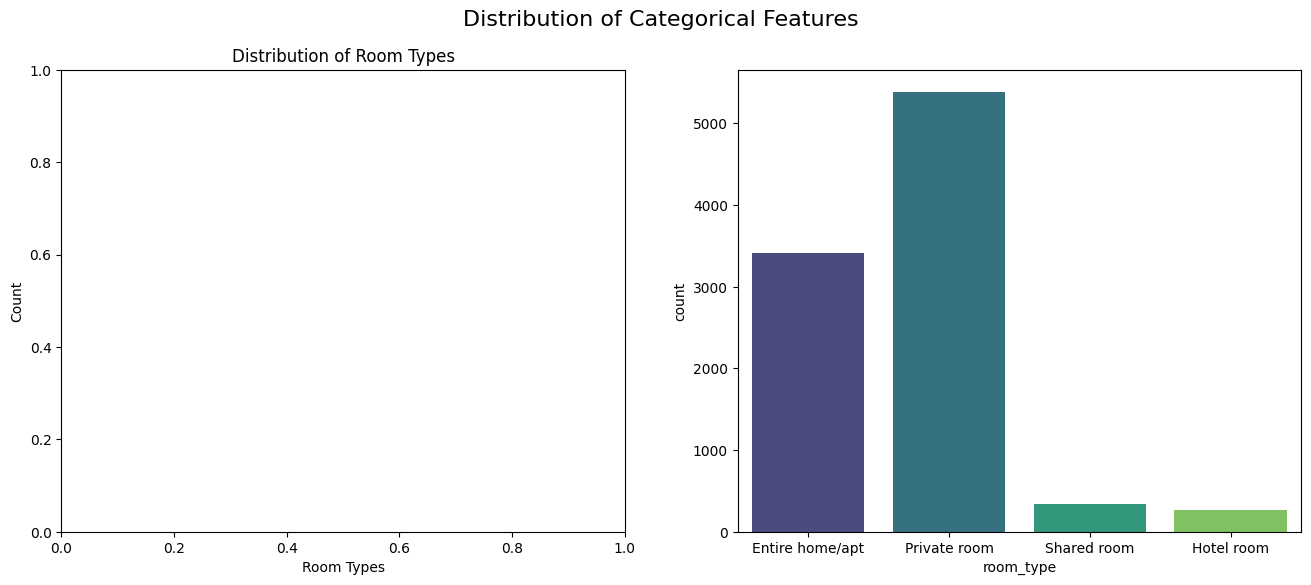

In [60]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle('Distribution of Categorical Features', fontsize=16)

# Plot the distribution of 'room_type'
sns.countplot(x='room_type', data=clean_data, palette='viridis')
axes[0].set_title('Distribution of Room Types')
axes[0].set_xlabel('Room Types')
axes[0].set_ylabel('Count')

In [62]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9408 entries, 0 to 9407
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         9408 non-null   int64  
 1   neighbourhood                   9408 non-null   object 
 2   latitude                        9408 non-null   float64
 3   longitude                       9408 non-null   float64
 4   room_type                       9408 non-null   object 
 5   price                           9408 non-null   int64  
 6   minimum_nights                  9408 non-null   int64  
 7   number_of_reviews               9408 non-null   int64  
 8   last_review                     9408 non-null   object 
 9   reviews_per_month               9408 non-null   float64
 10  calculated_host_listings_count  9408 non-null   int64  
 11  availability_365                9408 non-null   int64  
 12  number_of_reviews_ltm           94

<ipython-input-63-8511a24bac0b>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='price', data=clean_data, ci=None, ax=axes[0], sort=False)
<ipython-input-63-8511a24bac0b>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='number_of_reviews', data=clean_data, ci=None, ax=axes[1], sort=False)


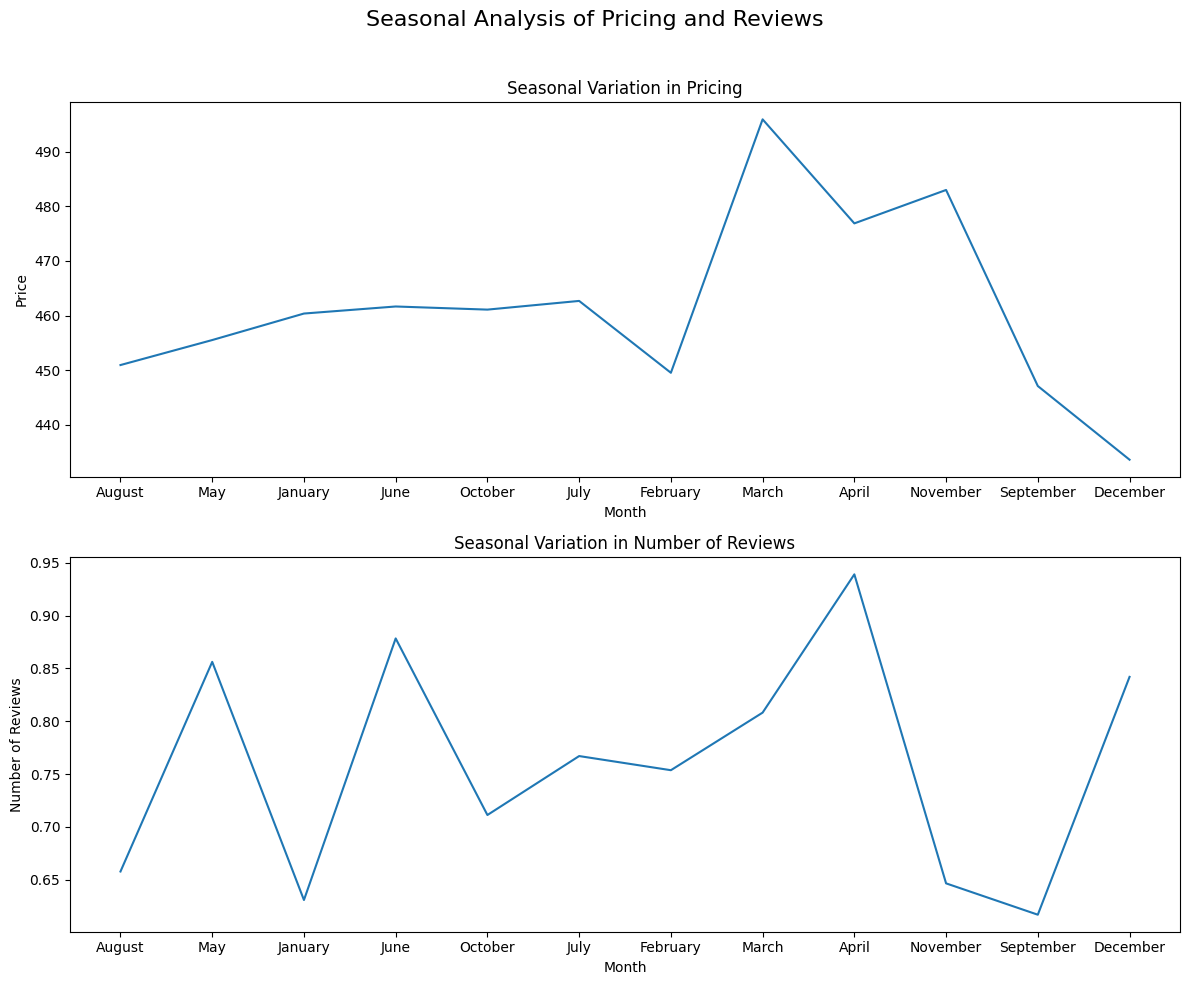

In [63]:
# Extract month and year from 'last_review'
# convert the last_review column into a datetime object
clean_data['last_review'] = pd.to_datetime(data1['last_review'], errors='coerce')
clean_data['month'] = clean_data['last_review'].dt.month_name()


# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
fig.suptitle("Seasonal Analysis of Pricing and Reviews", fontsize=16)

# Seasonal analysis of pricing
sns.lineplot(x='month', y='price', data=clean_data, ci=None, ax=axes[0], sort=False)
axes[0].set_title("Seasonal Variation in Pricing")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Price")

# Seasonal analysis of reviews
sns.lineplot(x='month', y='number_of_reviews', data=clean_data, ci=None, ax=axes[1], sort=False)
axes[1].set_title("Seasonal Variation in Number of Reviews")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Reviews")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<ipython-input-66-7c72644ba1b8>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='last_review', y='price', data=clean_data, ci=None, ax=axes[0])
<ipython-input-66-7c72644ba1b8>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='last_review', y='minimum_nights', data=clean_data, ci=None, ax=axes[1])
<ipython-input-66-7c72644ba1b8>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='last_review', y='number_of_reviews', data=clean_data, ci=None, ax=axes[2])


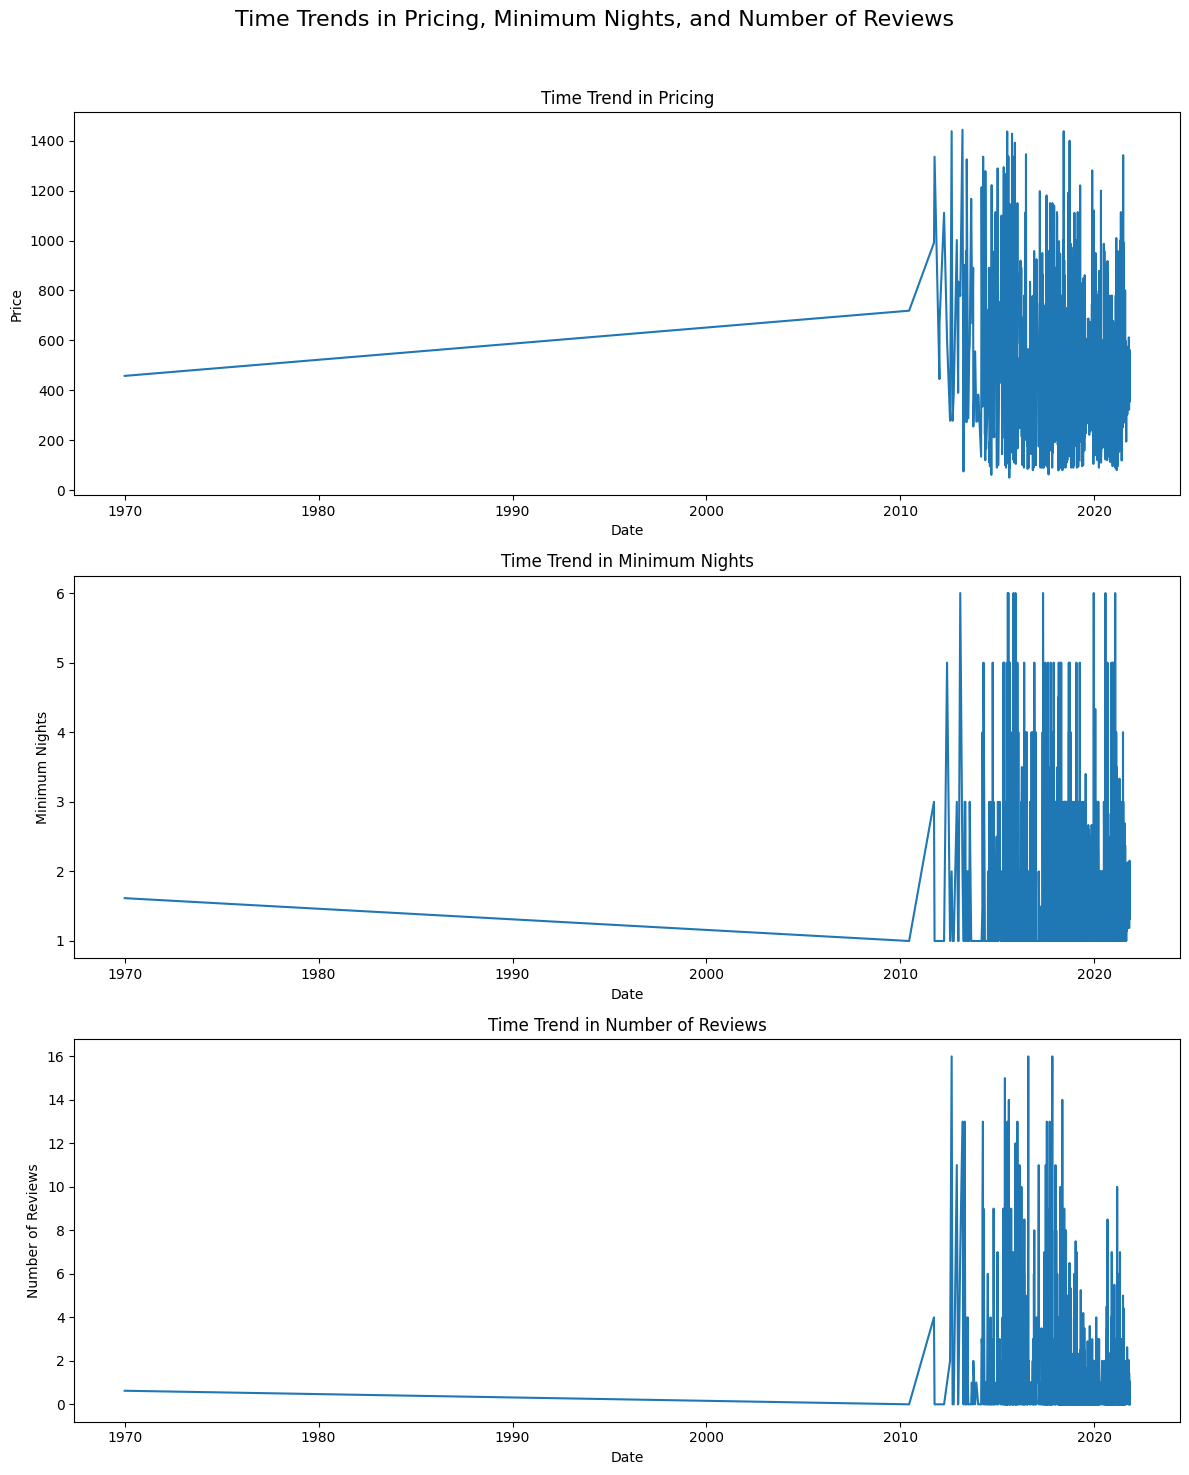

In [66]:
# Extract year and month from 'last_review'
clean_data['year'] = clean_data['last_review'].dt.year
clean_data['month'] = clean_data['last_review'].dt.month_name()

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
fig.suptitle("Time Trends in Pricing, Minimum Nights, and Number of Reviews", fontsize=16)

# Time trend in pricing
sns.lineplot(x='last_review', y='price', data=clean_data, ci=None, ax=axes[0])
axes[0].set_title("Time Trend in Pricing")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Price")

# Time trend in minimum nights
sns.lineplot(x='last_review', y='minimum_nights', data=clean_data, ci=None, ax=axes[1])
axes[1].set_title("Time Trend in Minimum Nights")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Minimum Nights")

# Time trend in number of reviews
sns.lineplot(x='last_review', y='number_of_reviews', data=clean_data, ci=None, ax=axes[2])
axes[2].set_title("Time Trend in Number of Reviews")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Number of Reviews")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Label encoding

In [85]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

clean_data['neighbourhood']=le.fit_transform(clean_data['neighbourhood'])
clean_data['room_type']=le.fit_transform(clean_data['room_type'])

Training and testing Model

In [79]:
clean_data['month'] = clean_data['last_review'].dt.month

In [86]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9408 entries, 0 to 9407
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_id                         9408 non-null   int64         
 1   neighbourhood                   9408 non-null   int64         
 2   latitude                        9408 non-null   float64       
 3   longitude                       9408 non-null   float64       
 4   room_type                       9408 non-null   int64         
 5   price                           9408 non-null   int64         
 6   minimum_nights                  9408 non-null   int64         
 7   number_of_reviews               9408 non-null   int64         
 8   last_review                     9408 non-null   datetime64[ns]
 9   reviews_per_month               9408 non-null   float64       
 10  calculated_host_listings_count  9408 non-null   int64         
 11  avai

In [87]:
X = clean_data.copy().drop(['price','last_review'], axis = 1)
y = clean_data['price'].copy()

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [89]:
reg1=LinearRegression()
reg1.fit(X_train,y_train)

LinearRegression()

In [90]:
y_pred = reg1.predict(X_test)
rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
print('Training Score: ', reg1.score(X_train, y_train))
print('Testing Score: ', reg1.score(X_test, y_test))
print('RMSE: ',rmse)

Training Score:  0.24071106248865415
Testing Score:  0.24536134688699174
RMSE:  278.6729599683887


In [91]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.24536134688699174

In [97]:
from sklearn.model_selection import cross_val_score, cross_validate

In [98]:
result= cross_validate(reg,X,y, cv=5, return_train_score=True, scoring='r2')
result

{'fit_time': array([0.05754185, 0.04353309, 0.0516634 , 0.04822063, 0.04720521]),
 'score_time': array([0.01024055, 0.00878549, 0.00968599, 0.00785756, 0.01575327]),
 'test_score': array([0.22150292, 0.27224568, 0.23464913, 0.1932766 , 0.14561643]),
 'train_score': array([0.2303924 , 0.23328515, 0.2415949 , 0.25095647, 0.2599821 ])}

In [99]:
train_acc=result['train_score'].mean()*100
print("Training Accuracy =",train_acc)

Training Accuracy = 24.324220584155647


In [100]:
test_acc=result['test_score'].mean()*100
print("Training Accuracy =",test_acc)

Training Accuracy = 21.34581512752268
